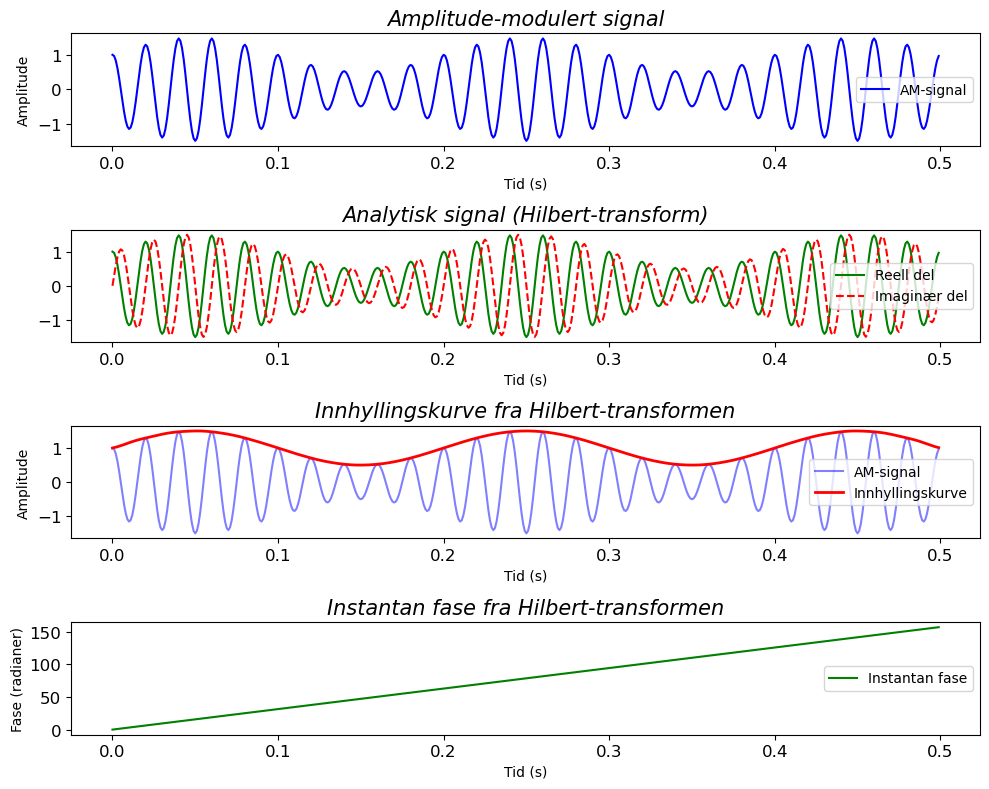

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parametere for signalet
fs = 1000        # Samplingsfrekvens (Hz)
t = np.arange(0, 0.5, 1/fs)  # Tid (1 sek)
carrier_freq = 50  # Bærefrekvens (Hz)
mod_freq = 5       # Modulasjonsfrekvens (Hz)
mod_index = 0.5    # Modulasjonsdybde

# Generer AM-signal: (1 + m * sin(2πfmt)) * cos(2πfct)
modulation = 1 + mod_index * np.sin(2 * np.pi * mod_freq * t)
carrier = np.cos(2 * np.pi * carrier_freq * t)
am_signal = modulation * carrier

# Beregn Hilbert-transformen (analytisk signal)
analytic_signal = hilbert(am_signal)
envelope = np.abs(analytic_signal)  # Innhyllingskurve
instant_phase = np.unwrap(np.angle(analytic_signal))  # Instantan fase

# Plot resultatene
plt.figure(figsize=(10, 8))

# Originalt AM-signal
plt.subplot(4, 1, 1)
plt.plot(t, am_signal, label="AM-signal", color='b')
plt.title("Amplitude-modulert signal",fontsize=15,style='italic')
plt.xlabel("Tid (s)")
plt.ylabel("Amplitude")
plt.legend(loc='center right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Analytisk signal (real + imaginær)
plt.subplot(4, 1, 2)
plt.plot(t, analytic_signal.real, label="Reell del", color='g')
plt.plot(t, analytic_signal.imag, label="Imaginær del", linestyle="dashed", color='r')
plt.title("Analytisk signal (Hilbert-transform)",fontsize=15,style='italic')
plt.xlabel("Tid (s)")
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Innhyllingskurve
plt.subplot(4, 1, 3)
plt.plot(t, am_signal, alpha=0.5, label="AM-signal", color='b')
plt.plot(t, envelope, label="Innhyllingskurve", color='r', linewidth=2)
plt.title("Innhyllingskurve fra Hilbert-transformen",fontsize=15,style='italic')
plt.xlabel("Tid (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



# Instantan fase
plt.subplot(4, 1, 4)
plt.plot(t, instant_phase, label="Instantan fase", color='g')
plt.title("Instantan fase fra Hilbert-transformen",fontsize=15,style='italic')
plt.xlabel("Tid (s)")
plt.ylabel("Fase (radianer)")
plt.legend(loc="center right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
save_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Hilbert_Transform.png"
plt.savefig(save_path, format="png", dpi=300)

plt.show()



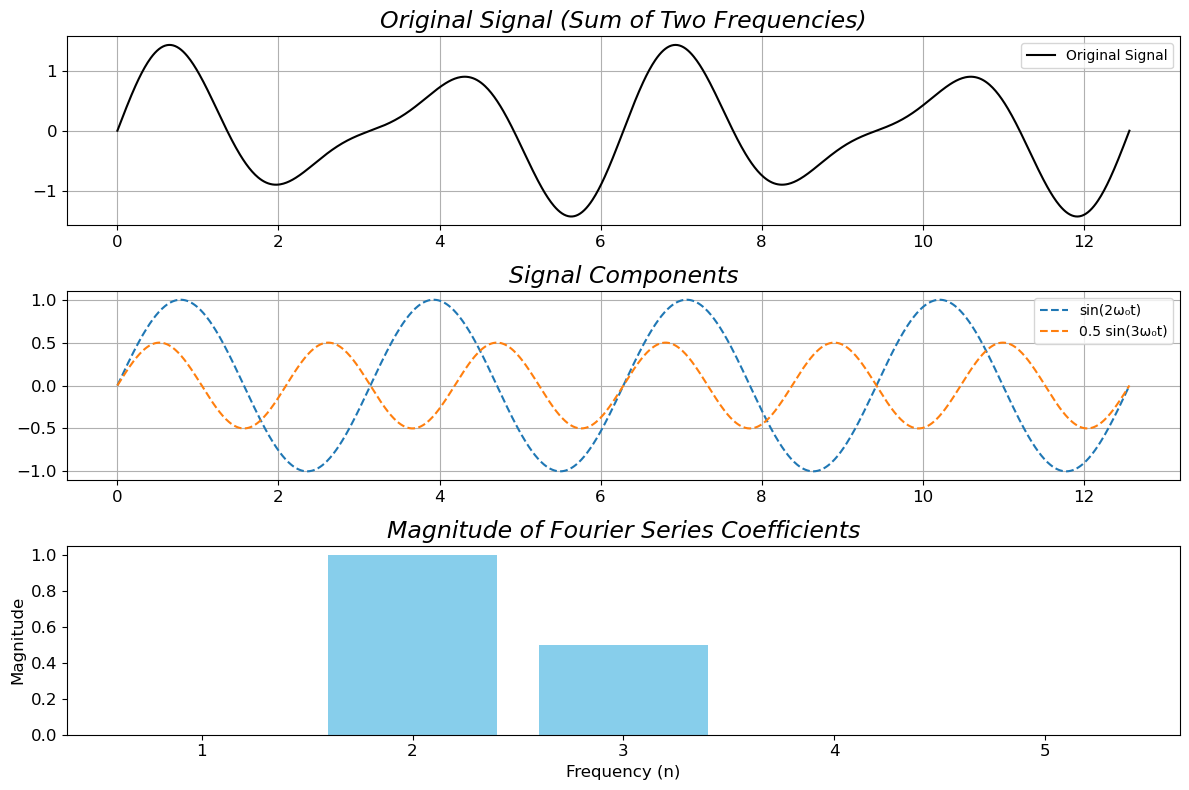

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define fundamental parameters
T = 2 * np.pi  # Period of the signal
w0 = 2 * np.pi / T  # Fundamental angular frequency

# Define the signal as a sum of two sine waves
def original_signal(t):
    return np.sin(2 * w0 * t) + 0.5 * np.sin(3 * w0 * t)

# Fourier coefficients
def a0():
    return (2 / T) * quad(original_signal, 0, T)[0]

def an(n):
    return (2 / T) * quad(lambda t: original_signal(t) * np.cos(n * w0 * t), 0, T)[0]

def bn(n):
    return (2 / T) * quad(lambda t: original_signal(t) * np.sin(n * w0 * t), 0, T)[0]

# Reconstruct the signal using Fourier series
def fourier_series(t, N):
    a_0 = a0() / 2  # DC component
    sum_terms = np.zeros_like(t)
    
    for n in range(1, N+1):
        sum_terms += an(n) * np.cos(n * w0 * t) + bn(n) * np.sin(n * w0 * t)
    
    return a_0 + sum_terms

# Time domain
t = np.linspace(0, 2 * T, 1000)

# Compute Fourier approximation
N_terms = 5  # Number of Fourier series terms
approx_signal = fourier_series(t, N_terms)

# Compute Fourier coefficients for bar plot
frequencies = np.arange(1, N_terms+1)
an_values = np.array([an(n) for n in frequencies])
bn_values = np.array([bn(n) for n in frequencies])

# Plot original signal and its components
fig = plt.figure(figsize=(12, 8))

# Plot time-domain signals and Fourier approximation
plt.subplot(3, 1, 1)
plt.plot(t, original_signal(t), label="Original Signal", color='black')
plt.title("Original Signal (Sum of Two Frequencies)",fontsize=17,style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid()

# Plot components of the signal
plt.subplot(3, 1, 2)
plt.plot(t, np.sin(2 * w0 * t), label="sin(2ω₀t)", linestyle="dashed")
plt.plot(t, 0.5 * np.sin(3 * w0 * t), label="0.5 sin(3ω₀t)", linestyle="dashed")
plt.title("Signal Components",fontsize=17,style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid()

# Plot Fourier series approximation
plt.subplot(3, 1, 3)
plt.bar(frequencies, np.sqrt(an_values**2 + bn_values**2), color='skyblue')
plt.xlabel("Frequency (n)",fontsize=12)
plt.ylabel("Magnitude",fontsize=12)
plt.title("Magnitude of Fourier Series Coefficients",fontsize=17,style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.grid()

plt.tight_layout()
fig.savefig(fname="/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Fourierrekke.png", format="png", dpi=300)
plt.show()



<Figure size 1600x800 with 0 Axes>

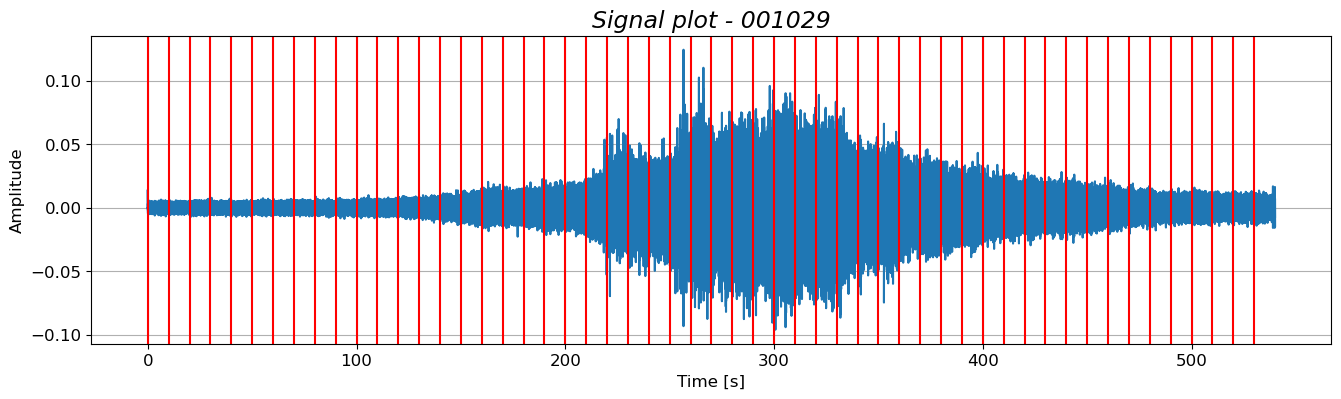

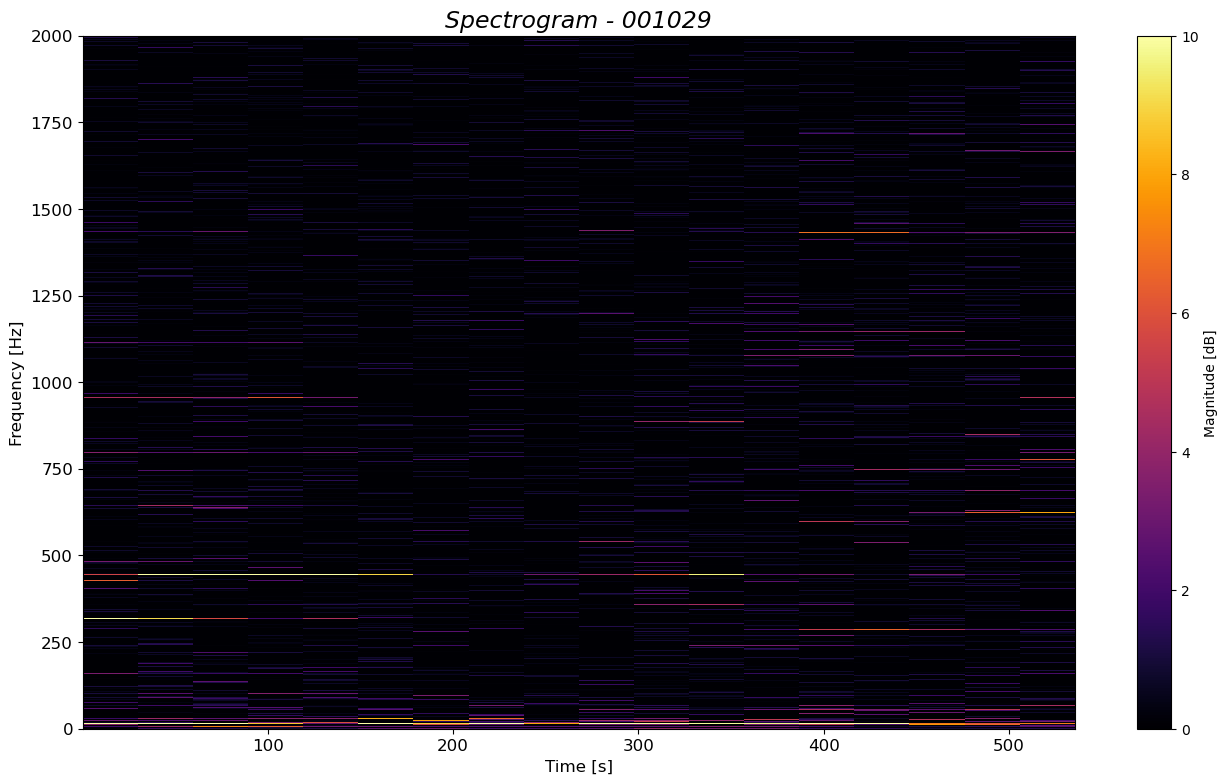

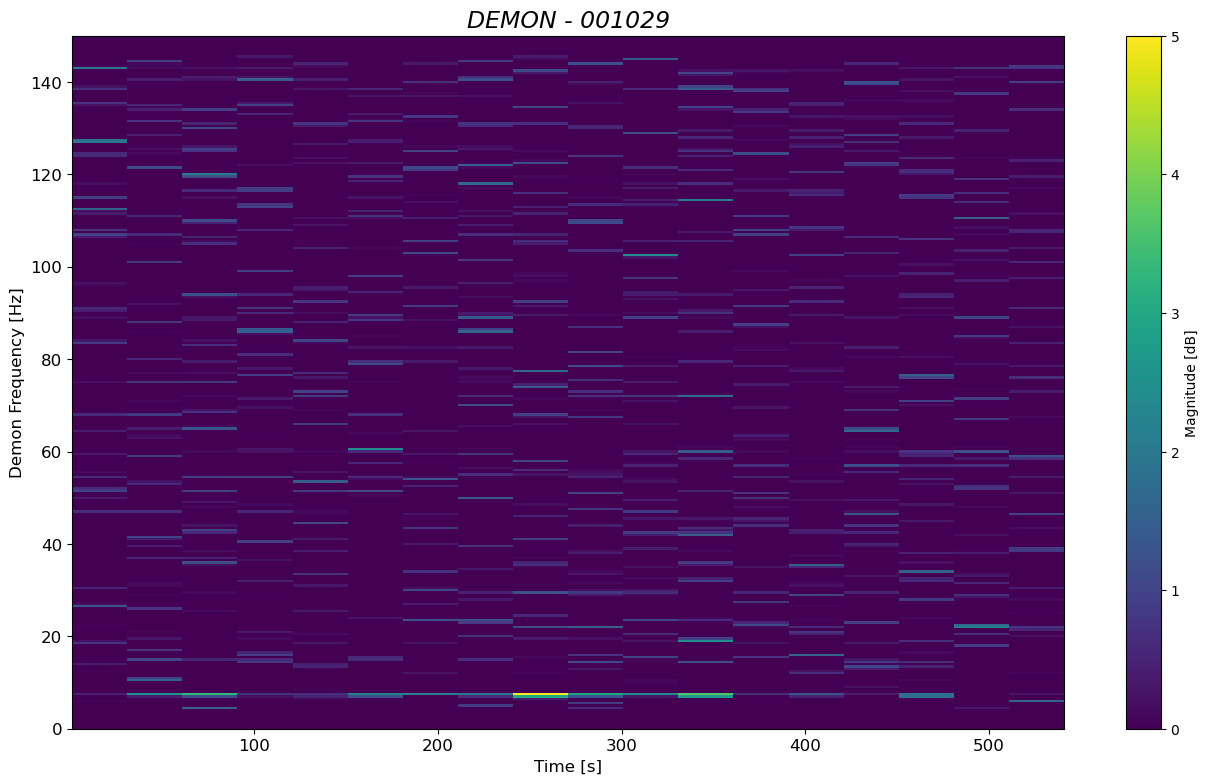

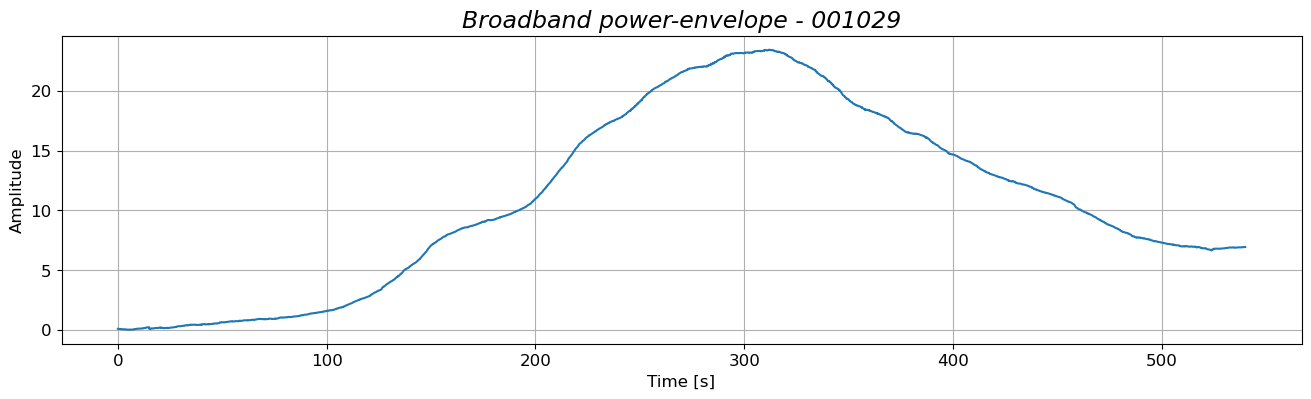

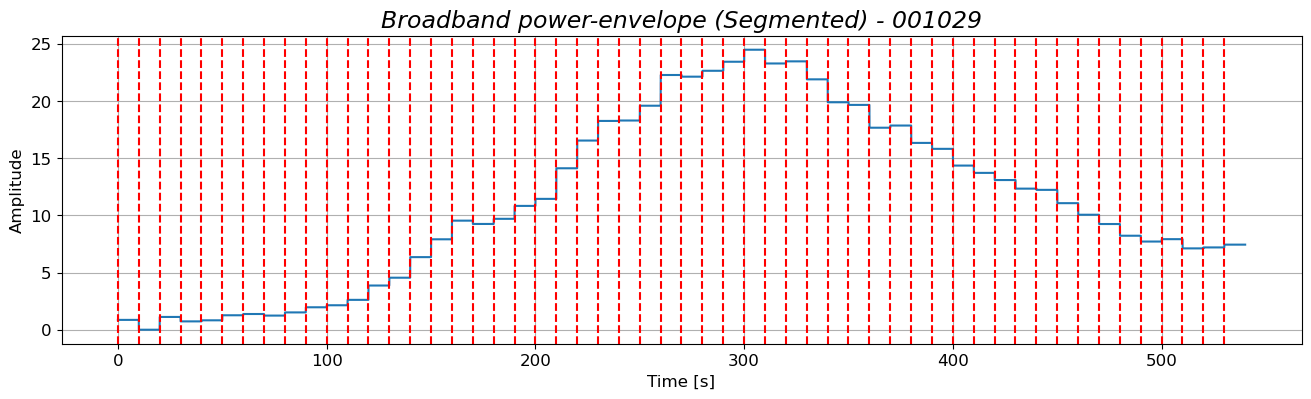

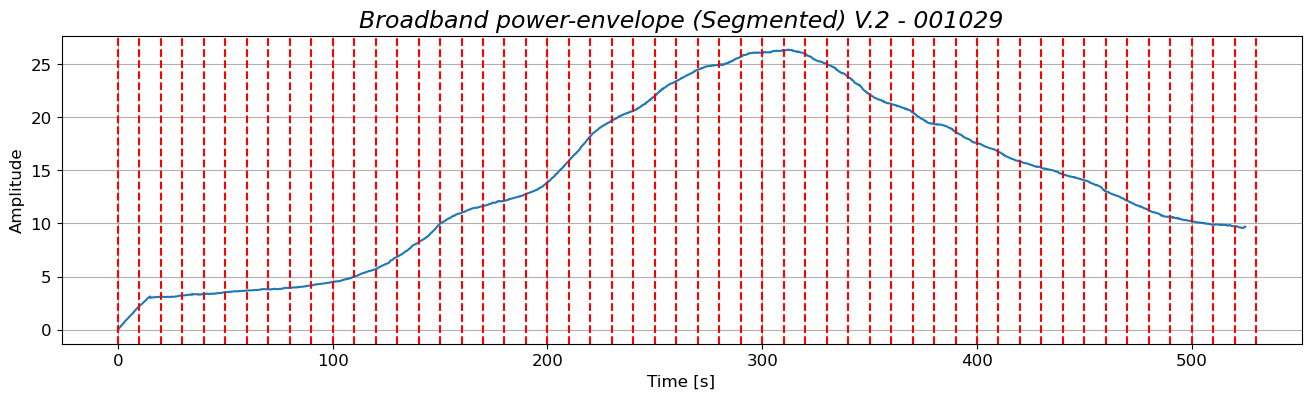

In [ ]:
#Opptak 001029
input_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
save_path_sig = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Signal_001029.png"
save_path_spec = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Spec_001029.png"
save_path_demon = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Demon_001029.png"
save_path_BB = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/BroadBand_001029.png"
save_path_BB_segmented = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/BroadBand_001029_segmented.png"

import functions
import matplotlib.pyplot as plt
import numpy as np

fs = 10000

sx, fs = functions.load_audiofile(input_path, fs, 5, True)
t = np.linspace(0,len(sx)/fs,len(sx))
figure = plt.figure(figsize=(16,8))
figure.suptitle("Testing med USV 21.03.25", fontsize=16)


fig1 = plt.figure(figsize=(16,4)) #Signal plot
plt.plot(t, sx)
_len = 10
for k in range(0,int(len(sx)/fs),_len):
    plt.axvline(x=k,color="red")

plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Signal plot - 001029",fontsize=17, style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
fig1.savefig(fname=save_path_sig, format="png", dpi=300)

fig2 = plt.figure(figsize=(16,9))
spec_t, spec_f, spec = functions.plot_spectrogram(sx,fs,tperseg=1, freq_filt=13, hfilt_length=30,f_max=2000,s_min=0,s_max=15,plot= False)
plt.pcolormesh(spec_t, spec_f, spec, vmin=0, vmax=10, cmap='inferno')  # Draw spectrogram image            
plt.xlabel("Time [s]",fontsize=12)         # Axis labels and scales
plt.ylabel("Frequency [Hz]",fontsize=12)
plt.title("Spectrogram - 001029",fontsize=17, style='italic')
plt.ylim(0, 2000)      
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig2.savefig(fname=save_path_spec, format="png", dpi=300)

fig3 = plt.figure(figsize=(16,9))
fds = 300
dem_t, dem_f, dem = functions.DEMON_from_data(sx,fs,Fds=fds,tperseg=2,freq_filt=11,hfilt_length=30,plot=False)
plt.pcolormesh(dem_t, dem_f, dem, vmin=0,vmax=5)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Demon Frequency [Hz]",fontsize=12)
plt.ylim(0,fds/2)
plt.title("DEMON - 001029",fontsize=17, style='italic')
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig3.savefig(fname=save_path_demon, format="png", dpi=300)

fig4 = plt.figure(figsize=(16,4))
BB, BB_t = functions.BB_data_old(sx,fs,hilbert_win=15,window_size=30)
BB = BB - np.min(BB)
plt.plot(BB_t, BB)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Broadband power-envelope - 001029",fontsize=17, style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
fig4.savefig(fname=save_path_BB, format="png", dpi=300)


fig5 = plt.figure(figsize=(16,4))
BB2 = []

for k in range(0,int(len(sx)/fs),_len):
    BB_current, BB_t, sxbuff = functions.BB_data_old(sx[k*fs:((_len+k)*fs)],fs,hilbert_win=15,window_size=30)
    BB2 = np.append(BB2,BB_current)

BB2 = BB2 - np.min(BB2)
BB_t2 = np.linspace(0,len(BB2)*15/fs,len(BB2))
plt.plot(BB_t2, BB2)
for k in range(0,int(len(sx)/fs),_len):
    plt.axvline(x=k,color="red",linestyle="--")

plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Broadband power-envelope (Segmented) - 001029",fontsize=17, style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
fig5.savefig(fname=save_path_BB_segmented, format="png", dpi=300)


fig6 = plt.figure(figsize=(16,4))
BB3 = []
BB_buff = []
for k in range(0,int(len(sx)/fs),_len):
    BB_current, BB_t, BB_buff = functions.BB_data(sx[k*fs:((_len+k)*fs)],fs, BB_buff,hilbert_win=15,window_size=30)
    BB3 = np.append(BB3,BB_current)
BB3 = BB3[int(15*fs/15):]
BB3 = BB3 - np.min(BB3)
BB_t3 = np.linspace(0,len(BB3)*15/fs,len(BB3))
plt.plot(BB_t3, BB3)
for k in range(0,int(len(sx)/fs),_len):
    plt.axvline(x=k,color="red",linestyle="--")

plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Broadband power-envelope (Segmented) V.2 - 001029",fontsize=17, style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
fig6.savefig(fname=save_path_BB_segmented, format="png", dpi=300)

#T = functions.BroadBand_from_data(sx,fs,hilbert_win=15,window_size=30,trigger=8,plot=True)


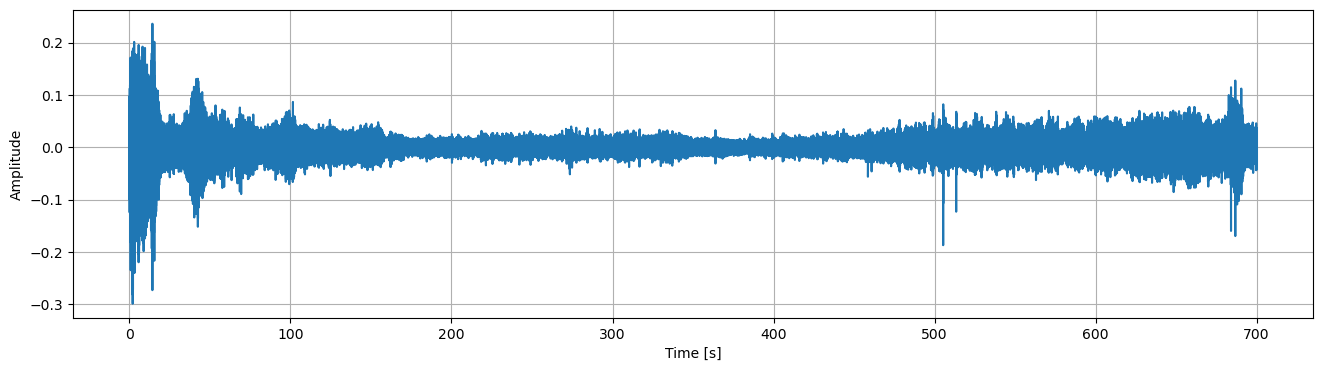

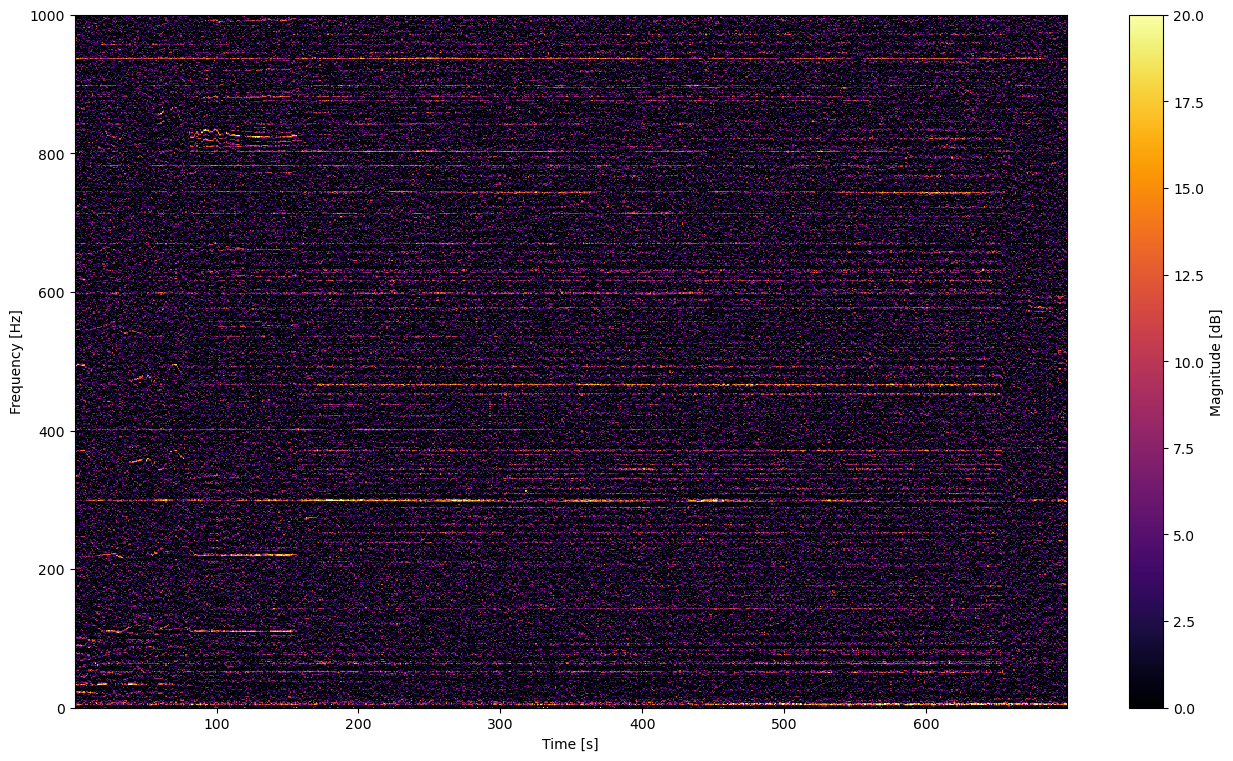

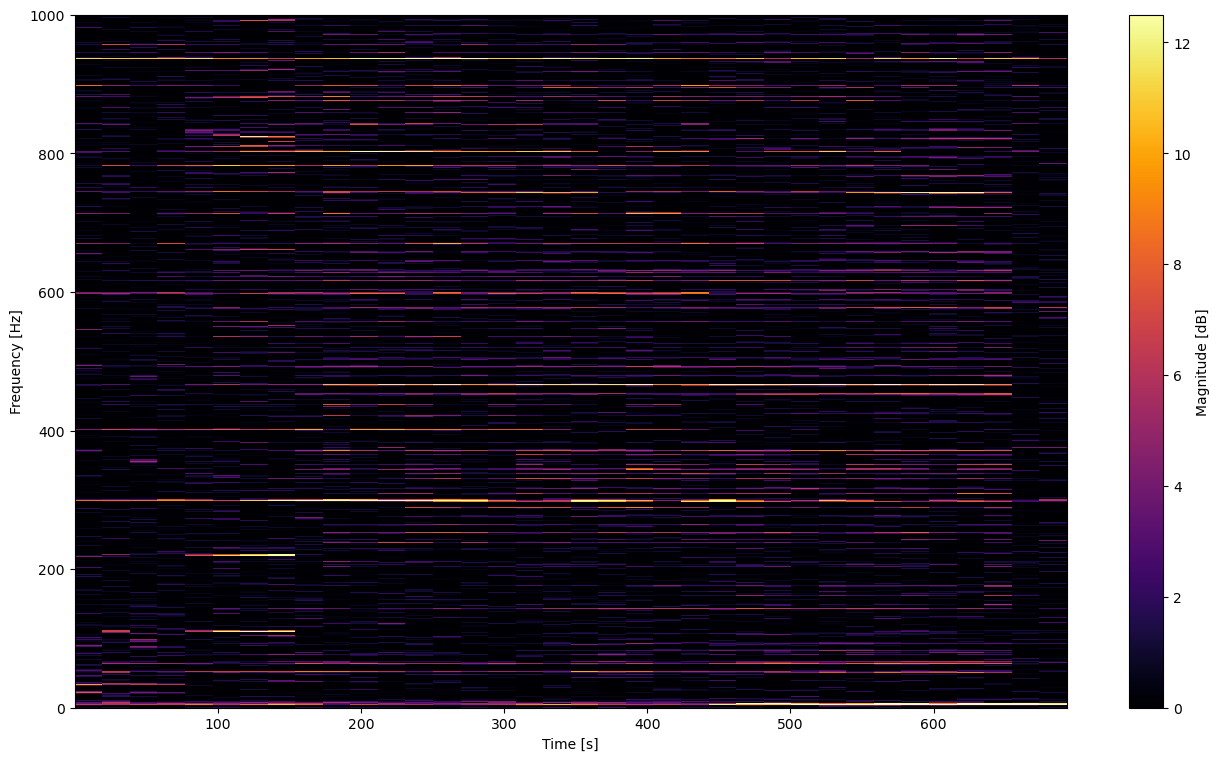

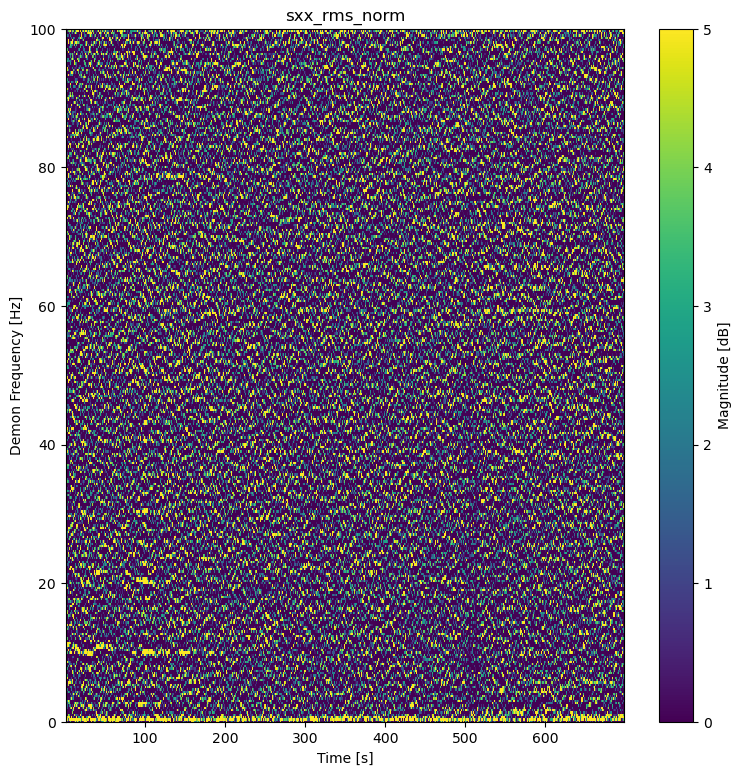

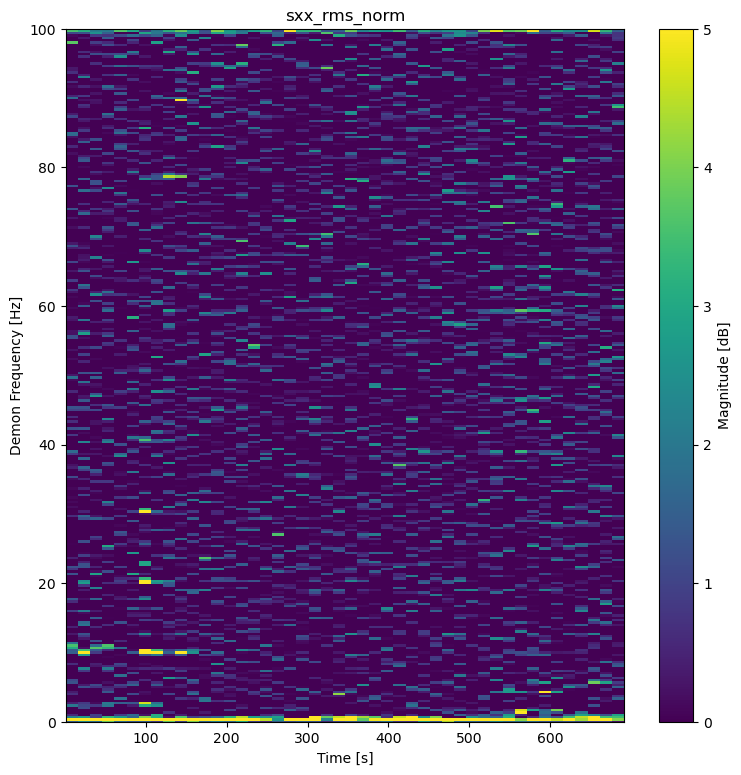

In [17]:
import functions
from scipy import signal
import librosa
import numpy as np
#Broad band and Demon testing
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/3.wav"
output_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Signal_plot.jpeg"
x,fs = functions.load_audiofile(input_file,fs=3000,fc_low=5)
x = x[800*fs:1500*fs]

t = np.linspace(0,len(x)/fs,len(x))
sig = functions.plot_signal(x,t,output_path)


s  = functions.plot_spectrogram(x,fs,tperseg=1,freq_filt=13,hfilt_length=1,f_max=1000,s_min=0,s_max=20)
s  = functions.plot_spectrogram(x,fs,tperseg=1,freq_filt=13,hfilt_length=20,f_max=1000,s_min=0,s_max=12.5)

d = functions.DEMON_from_data(x,fs,Fds=200,freq_filt=7,hfilt_length=1,fmax=100,s_max=5)
d = functions.DEMON_from_data(x,fs,Fds=200,freq_filt=7,hfilt_length=15,fmax=100,s_max=5)

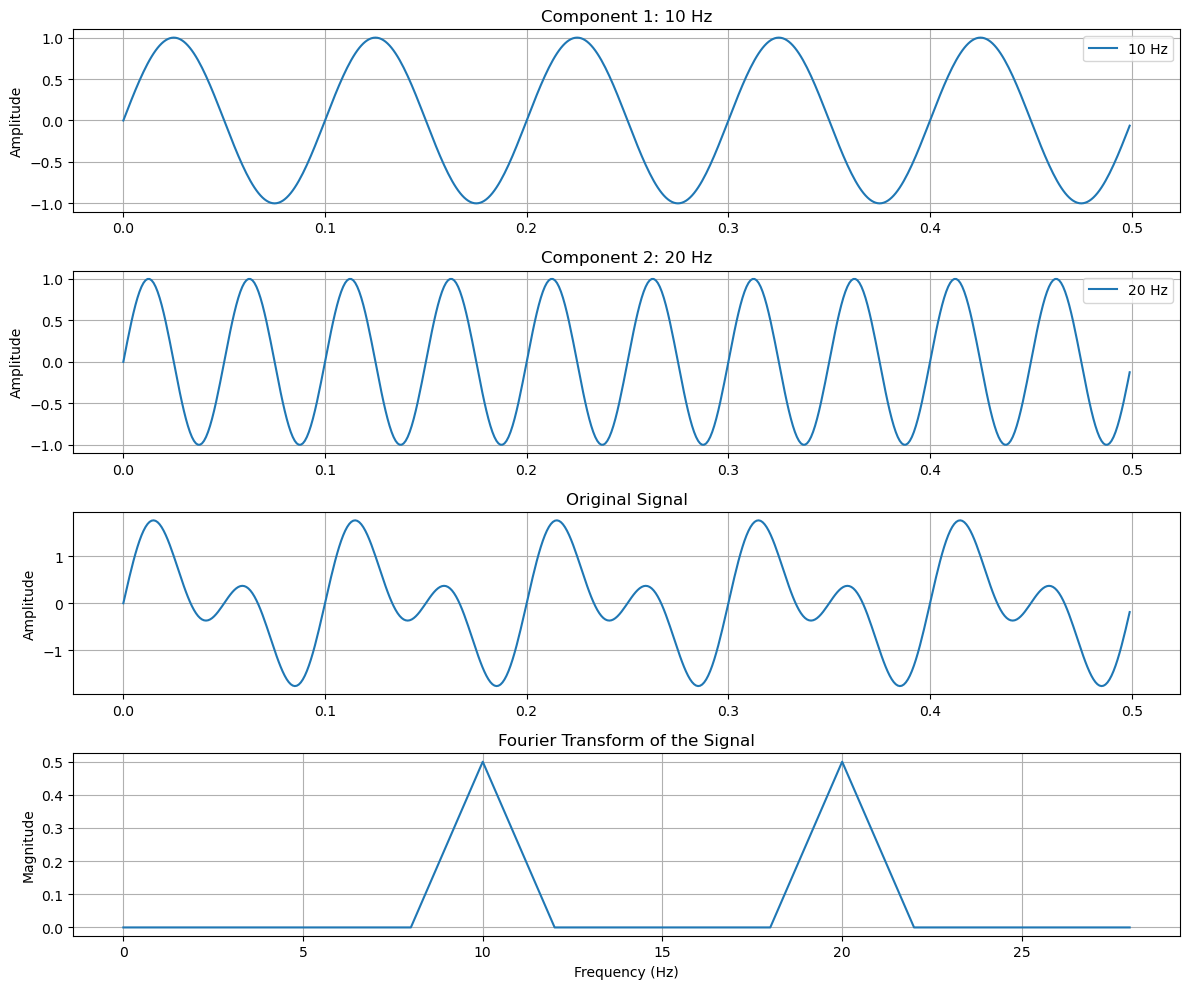

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(frequencies, duration=1.0, sampling_rate=1000):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    components = [np.sin(2 * np.pi * f * t) for f in frequencies]
    signal = np.sum(components, axis=0)
    return t, signal, components

def compute_fourier_transform(signal, sampling_rate):
    N = len(signal)
    fft_output = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    magnitude = np.abs(fft_output) / N
    return frequencies, magnitude

if __name__ == "__main__":
    sampling_rate = 1000  # Hz
    frequencies = [10, 20]  # Example frequencies in Hz
    duration = 0.5 # seconds
    
    t, signal, components = generate_signal(frequencies, duration, sampling_rate)
    
    fig, axes = plt.subplots(len(components) + 2, 1, figsize=(12, 10), sharex=False)
    
    for i, component in enumerate(components):
        axes[i].plot(t, component, label=f"{frequencies[i]} Hz")
        axes[i].set_title(f"Component {i+1}: {frequencies[i]} Hz")
        axes[i].set_ylabel("Amplitude")
        axes[i].grid()
        axes[i].legend()
    
    axes[len(components)].plot(t, signal)
    axes[len(components)].set_title("Original Signal")
    axes[len(components)].set_ylabel("Amplitude")
    axes[len(components)].grid()
    
    freqs, magnitudes = compute_fourier_transform(signal, sampling_rate)
    axes[-1].plot(freqs[:15], magnitudes[:15])  # Only positive frequencies
    axes[-1].set_title("Fourier Transform of the Signal")
    axes[-1].set_xlabel("Frequency (Hz)")
    axes[-1].set_ylabel("Magnitude")
    axes[-1].grid()
    
    plt.tight_layout()
    save_path = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/Fourier_Transform.jpeg"
    plt.savefig(save_path, format="jpeg", dpi=300)
    plt.show()


t = 7.8092311669606715


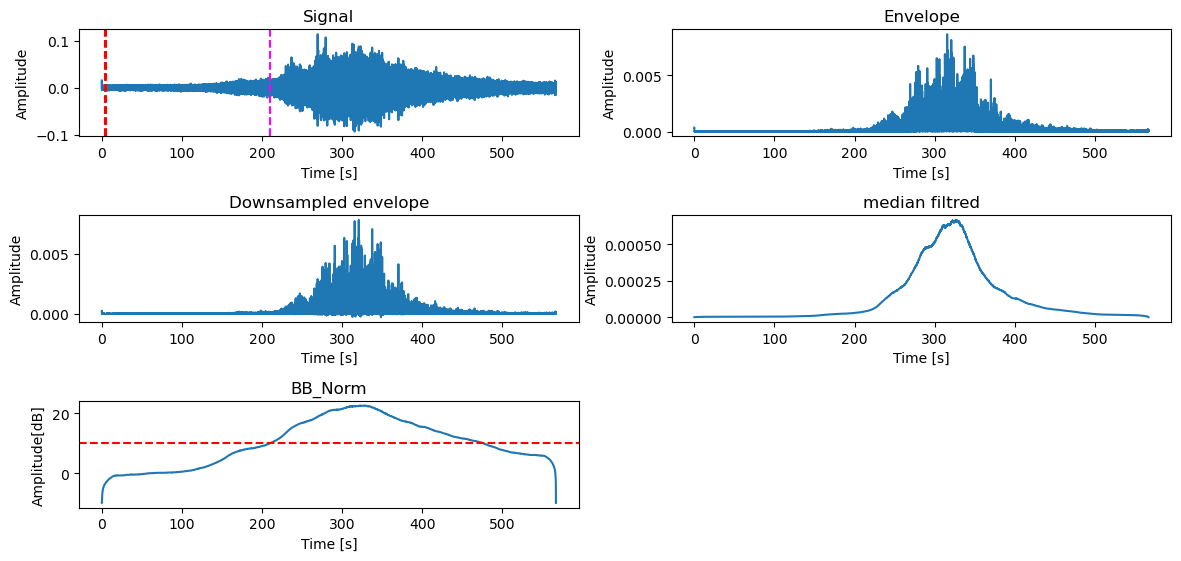

In [1]:
#BroadBand
import numpy as np
from functions import spec_hfilt2, medfilt_vertcal_norm, load_audiofile, locate_low_amp
import scipy.signal as signal
from scipy.signal import resample_poly, hilbert
import matplotlib.pyplot as plt
from time import perf_counter

t0 = perf_counter()

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
Fs  = 3000
Sx, Fs = load_audiofile(input_file,Fs,fc_low=5, remove_offcet=True)
hilbert_win  = 15
window_size = 30
trigger = 10
plot = False




# Apply Hilbert transform to the signal, take the absolute value, square the result (power envelope), and then apply a median filter
# to smooth the squared analytic signal. The window size for the median filter is defined by `medfilt_window`.
envelope = signal.medfilt(np.square(np.abs(hilbert(Sx))),hilbert_win)

    # Downsample the filtered signal
DS_Sx = resample_poly(envelope, 1, hilbert_win)  # Resample by the median filter window size
DS_Fs = Fs / hilbert_win  # New sampling rate after downsampling

# Define kernel size for the median filter based on window size
kernel_size = int(window_size * DS_Fs) | 1  # Ensure odd size
signal_med = signal.medfilt(DS_Sx, kernel_size)  # Apply median filter for further noise removal

#noise = locate_low_amp(signal_med, kernel_size) #Determine the noise form the signal
# Auto noise detection: Identify long segments of similar values
signal_med2 = signal_med[kernel_size:-kernel_size]  # Remove edges affected by filter size

# Step 1: Identify consecutive regions with the same value (groups)
indices = np.arange(len(signal_med2))  # Create an array of indices
groups = np.split(indices, np.where(np.diff(signal_med2) != 0)[0] + 1)  # Split into groups of similar values

# Step 2: Compute the average amplitude for each group
group_averages = np.array([np.mean(signal_med2[g]) for g in groups])

# Step 3: Define a threshold based on the lowest average amplitude
min_avg = np.min(group_averages)  # Minimum group average
threshold = min_avg * 1.5  # Threshold to allow some variation, 1.5 eq to +- 50%

# Step 4: Find the longest group that is below the threshold
valid_groups = [g for g, avg in zip(groups, group_averages) if avg <= threshold]
longest_group = max(valid_groups, key=len) if valid_groups else None  # Longest valid group

if longest_group is None or len(longest_group) == 0:
    middle_index = None  # No valid group found

# Step 5: Determine the middle index of the longest group
middle_index = kernel_size + longest_group[len(longest_group) // 2]

# Calculate the noise start and stop indices based on the middle of the group
noise_start = int(middle_index - (kernel_size // 2))
noise_stop = int(middle_index + (kernel_size // 2))
noise = np.mean(signal_med[noise_start:noise_stop])  # Calculate the noise level


# Normalize the signal by the noise level and subtract the trigger threshold
norm_vals = np.maximum(signal_med/noise,0.1)
signal_vals = 10 * np.log10(norm_vals) - trigger


t1 = perf_counter()
print(f"t = {t1-t0}")
# Try to detect trigger times based on the normalized signal
try:
    # Indices where the signal exceeds threshold
    indices = np.where((signal_vals[:-1] <= 0) & (signal_vals[1:] > 0))[0]
    Trigger_time = indices / DS_Fs  # Convert indices to time
except:
    Trigger_time = None  # Set to None if no triggers are found
    print("Warning: Trigger is too high")  # Inform the user if no trigger time is registered
    print("No trigger time registered")

# If plotting is enabled, plot the results
if plot == True:
    BBnorm_t = np.linspace(0, (len(signal_vals) / DS_Fs), len(signal_vals))  # Time vector for the normalized signal

    plt.figure(figsize=(12, 6))  # Set up the figure for plotting
    plt.plot(BBnorm_t, signal_vals + trigger)  # Plot the normalized signal
    plt.axhline(y=trigger, color='red', linestyle='--', label="Trigger")  # Plot the trigger threshold
    plt.title("BBnorm")  # Title of the plot
    plt.xlabel("Time [s]")  # X-axis label
    plt.ylabel("Amplitude [dB]")  # Y-axis label
    plt.show()  # Show the plot





# Plot various stages of the signal processing pipeline for debugging
t = np.linspace(0, len(Sx) / Fs, len(Sx))  # Time vector for the original signal
DS_t = np.linspace(0, len(DS_Sx) / DS_Fs, len(DS_Sx))
plt.figure(figsize=(12, 9))  # Set up the figure for debugging plots

plt.subplot(5, 2, 1)
plt.plot(t, Sx)  # Plot original signal
plt.axvline(x=noise_start / Fs, color='red', linestyle='--')
plt.axvline(x=noise_stop / Fs, color='red', linestyle='--')
plt.axvline(x=Trigger_time[0], color='magenta', linestyle='--')
plt.title("Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 2)
plt.plot(t, envelope)  # Plot analytic signal
plt.title("Envelope")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 3)
plt.plot(DS_t, DS_Sx)  # Plot squared analytic signal
plt.title("Downsampled envelope")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 4)
plt.plot(DS_t, signal_med)  # Plot filtered signal
plt.title("median filtred")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 5)
BBnorm_t = np.linspace(0, (len(signal_vals) / DS_Fs), len(signal_vals))
plt.plot(BBnorm_t, signal_vals+trigger)  # Plot downsampled signal
plt.title("BB_Norm")
plt.axhline(y=trigger, color='red', linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude[dB]")



plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Show the debug plots

t = 1.6114557499531657


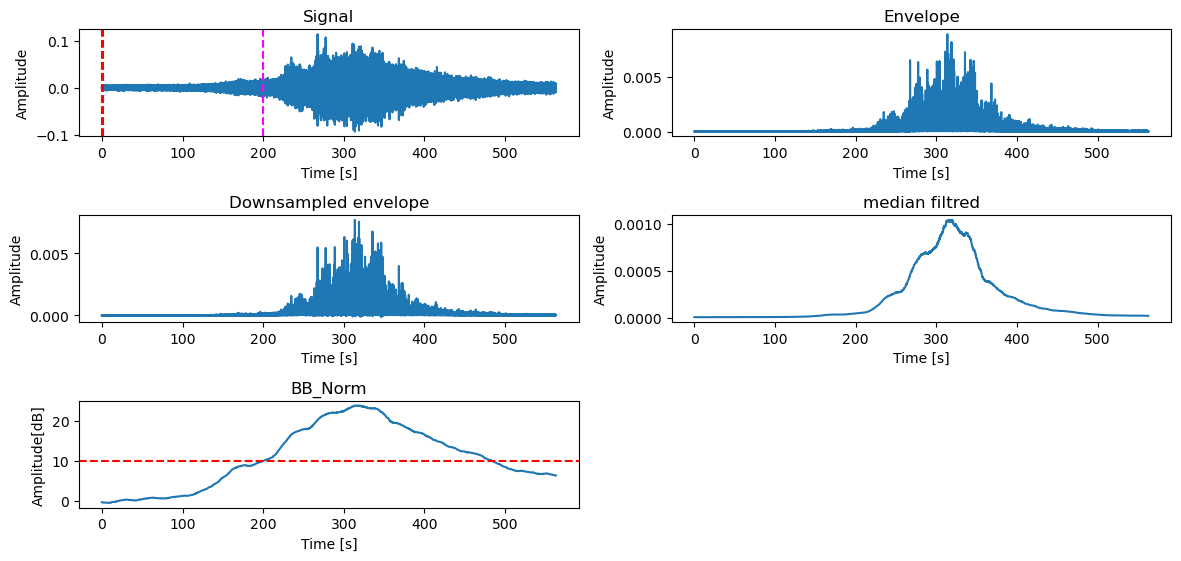

In [2]:
#BroadBand Avg filter approach
import numpy as np
from functions import spec_hfilt2, medfilt_vertcal_norm, load_audiofile, locate_low_amp
import scipy.signal as signal
from scipy.signal import resample_poly, hilbert
import matplotlib.pyplot as plt
from time import perf_counter

t0 = perf_counter()
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
Fs  = 3000
Sx, Fs = load_audiofile(input_file,Fs, fc_low=5,remove_offcet=True)
Sx = Sx[2*Fs:-2*Fs]
hilbert_win  = 15
window_size = 20
trigger = 10
plot = False


def moving_average_padded(signal, window_size=5):
    pad_size = window_size // 2
    padded_signal = np.pad(signal, pad_size, mode='edge')  # Repeat edge values
    kernel = np.ones(window_size) / window_size
    smoothed = np.convolve(padded_signal, kernel, mode='valid')  # Only keep valid parts
    return smoothed

# Apply Hilbert transform to the signal, take the absolute value, square the result (power envelope), and then apply a median filter
# to smooth the squared analytic signal. The window size for the median filter is defined by `medfilt_window`.
envelope = moving_average_padded(np.square(np.abs(hilbert(Sx))),hilbert_win)

    # Downsample the filtered signal
DS_Sx = resample_poly(envelope, 1, hilbert_win)  # Resample by the median filter window size
DS_Fs = Fs / hilbert_win  # New sampling rate after downsampling

# Define kernel size for the median filter based on window size
kernel_size = int(window_size * DS_Fs) | 1  # Ensure odd size
signal_med = moving_average_padded(DS_Sx, kernel_size)  # Apply median filter for further noise removal

#noise = locate_low_amp(signal_med, kernel_size) #Determine the noise form the signal
# Auto noise detection: Identify long segments of similar values
signal_med2 = signal_med[kernel_size:-kernel_size]  # Remove edges affected by filter size

# Step 1: Identify consecutive regions with the same value (groups)
indices = np.arange(len(signal_med2))  # Create an array of indices
groups = np.split(indices, np.where(np.diff(signal_med2) != 0)[0] + 1)  # Split into groups of similar values

# Step 2: Compute the average amplitude for each group
group_averages = np.array([np.mean(signal_med2[g]) for g in groups])

# Step 3: Define a threshold based on the lowest average amplitude
min_avg = np.min(group_averages)  # Minimum group average
threshold = min_avg * 1.5  # Threshold to allow some variation, 1.5 eq to +- 50%

# Step 4: Find the longest group that is below the threshold
valid_groups = [g for g, avg in zip(groups, group_averages) if avg <= threshold]
longest_group = max(valid_groups, key=len) if valid_groups else None  # Longest valid group

if longest_group is None or len(longest_group) == 0:
    middle_index = None  # No valid group found

# Step 5: Determine the middle index of the longest group
middle_index = kernel_size + longest_group[len(longest_group) // 2]

# Calculate the noise start and stop indices based on the middle of the group
noise_start = int(middle_index - (kernel_size // 2))
noise_stop = int(middle_index + (kernel_size // 2))
noise = np.mean(signal_med[noise_start:noise_stop])  # Calculate the noise level


# Normalize the signal by the noise level and subtract the trigger threshold
norm_vals = np.maximum(signal_med/noise,0.1)
signal_vals = 10 * np.log10(norm_vals) - trigger

t1 = perf_counter()
print(f"t = {t1-t0}")

# Try to detect trigger times based on the normalized signal
try:
    # Indices where the signal exceeds threshold
    indices = np.where((signal_vals[:-1] <= 0) & (signal_vals[1:] > 0))[0]
    Trigger_time = indices / DS_Fs  # Convert indices to time
except:
    Trigger_time = None  # Set to None if no triggers are found
    print("Warning: Trigger is too high")  # Inform the user if no trigger time is registered
    print("No trigger time registered")

# If plotting is enabled, plot the results
if plot == True:
    BBnorm_t = np.linspace(0, (len(signal_vals) / DS_Fs), len(signal_vals))  # Time vector for the normalized signal

    plt.figure(figsize=(12, 6))  # Set up the figure for plotting
    plt.plot(BBnorm_t, signal_vals + trigger)  # Plot the normalized signal
    plt.axhline(y=trigger, color='red', linestyle='--', label="Trigger")  # Plot the trigger threshold
    plt.title("BBnorm")  # Title of the plot
    plt.xlabel("Time [s]")  # X-axis label
    plt.ylabel("Amplitude [dB]")  # Y-axis label
    plt.show()  # Show the plot


# Plot various stages of the signal processing pipeline for debugging
t = np.linspace(0, len(Sx) / Fs, len(Sx))  # Time vector for the original signal
DS_t = np.linspace(0, len(DS_Sx) / DS_Fs, len(DS_Sx))
plt.figure(figsize=(12, 9))  # Set up the figure for debugging plots

plt.subplot(5, 2, 1)
plt.plot(t, Sx)  # Plot original signal
plt.axvline(x=noise_start / Fs, color='red', linestyle='--')
plt.axvline(x=noise_stop / Fs, color='red', linestyle='--')
plt.axvline(x=Trigger_time[0], color='magenta', linestyle='--')
plt.title("Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 2)
plt.plot(t, envelope)  # Plot analytic signal
plt.title("Envelope")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 3)
plt.plot(DS_t, DS_Sx)  # Plot squared analytic signal
plt.title("Downsampled envelope")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 4)
plt.plot(DS_t, signal_med)  # Plot filtered signal
plt.title("median filtred")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 5)
BBnorm_t = np.linspace(0, (len(signal_vals) / DS_Fs), len(signal_vals))
plt.plot(BBnorm_t, signal_vals+trigger)  # Plot downsampled signal
plt.title("BB_Norm")
plt.axhline(y=trigger, color='red', linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude[dB]")



plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Show the debug plots


t = 1.7570271249860525


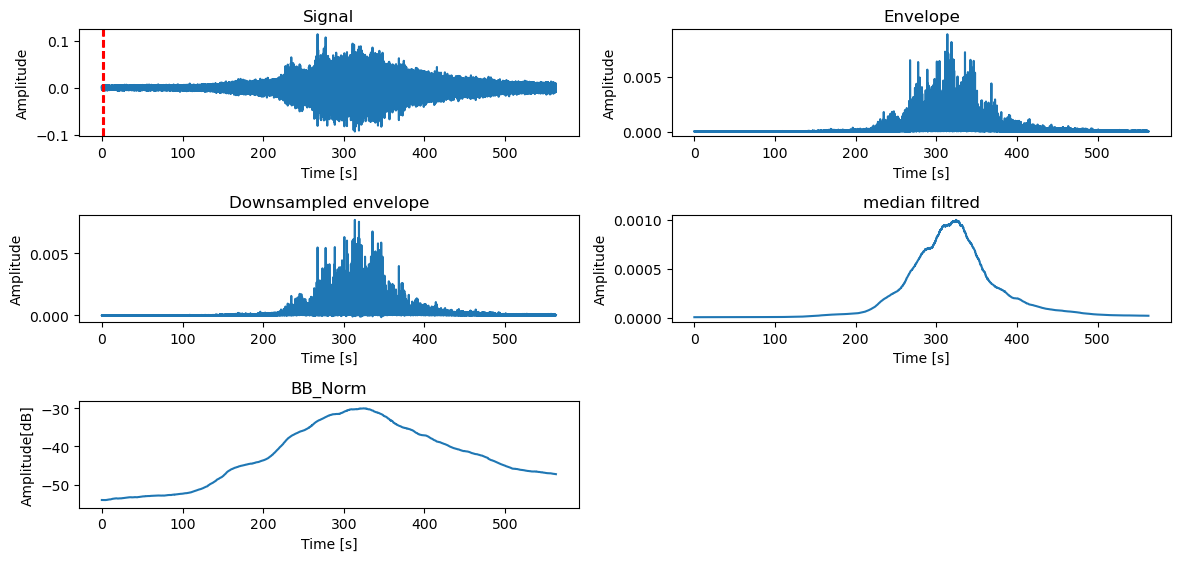

In [2]:
#BroadBand Avg filter approach
import numpy as np
from functions import spec_hfilt2, medfilt_vertcal_norm, load_audiofile, locate_low_amp
import scipy.signal as signal
from scipy.signal import resample_poly, hilbert
import matplotlib.pyplot as plt
from time import perf_counter

t0 = perf_counter()
input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
Fs  = 3000
Sx, Fs = load_audiofile(input_file,Fs, fc_low=5,remove_offcet=True)
Sx = Sx[2*Fs:-2*Fs]
hilbert_win  = 15
window_size = 30
trigger = 10
plot = False


def moving_average_padded(signal, window_size=5):
    pad_size = window_size // 2
    padded_signal = np.pad(signal, pad_size, mode='edge')  # Repeat edge values
    kernel = np.ones(window_size) / window_size
    smoothed = np.convolve(padded_signal, kernel, mode='valid')  # Only keep valid parts
    return smoothed

# Apply Hilbert transform to the signal, take the absolute value, square the result (power envelope), and then apply a median filter
# to smooth the squared analytic signal. The window size for the median filter is defined by `medfilt_window`.
envelope = moving_average_padded(np.square(np.abs(hilbert(Sx))),hilbert_win)

    # Downsample the filtered signal
DS_Sx = resample_poly(envelope, 1, hilbert_win)  # Resample by the median filter window size
DS_Fs = Fs / hilbert_win  # New sampling rate after downsampling

# Define kernel size for the median filter based on window size
kernel_size = int(window_size * DS_Fs) | 1  # Ensure odd size
signal_med = moving_average_padded(DS_Sx, kernel_size)  # Apply median filter for further noise removal

#noise = locate_low_amp(signal_med, kernel_size) #Determine the noise form the signal
# Auto noise detection: Identify long segments of similar values
signal_med2 = signal_med[kernel_size:-kernel_size]  # Remove edges affected by filter size

# Step 1: Identify consecutive regions with the same value (groups)
indices = np.arange(len(signal_med2))  # Create an array of indices
groups = np.split(indices, np.where(np.diff(signal_med2) != 0)[0] + 1)  # Split into groups of similar values

# Step 2: Compute the average amplitude for each group
group_averages = np.array([np.mean(signal_med2[g]) for g in groups])

# Step 3: Define a threshold based on the lowest average amplitude
min_avg = np.min(group_averages)  # Minimum group average
threshold = min_avg * 1.5  # Threshold to allow some variation, 1.5 eq to +- 50%

# Step 4: Find the longest group that is below the threshold
valid_groups = [g for g, avg in zip(groups, group_averages) if avg <= threshold]
longest_group = max(valid_groups, key=len) if valid_groups else None  # Longest valid group

if longest_group is None or len(longest_group) == 0:
    middle_index = None  # No valid group found

# Step 5: Determine the middle index of the longest group
middle_index = kernel_size + longest_group[len(longest_group) // 2]

# Calculate the noise start and stop indices based on the middle of the group
noise_start = int(middle_index - (kernel_size // 2))
noise_stop = int(middle_index + (kernel_size // 2))
noise = np.mean(signal_med[noise_start:noise_stop])  # Calculate the noise level


# Normalize the signal by the noise level and subtract the trigger threshold

signal_vals = 10 * np.log10(signal_med) - trigger

t1 = perf_counter()
print(f"t = {t1-t0}")

# Try to detect trigger times based on the normalized signal
try:
    # Indices where the signal exceeds threshold
    indices = np.where((signal_vals[:-1] <= 0) & (signal_vals[1:] > 0))[0]
    Trigger_time = indices / DS_Fs  # Convert indices to time
except:
    Trigger_time = None  # Set to None if no triggers are found
    print("Warning: Trigger is too high")  # Inform the user if no trigger time is registered
    print("No trigger time registered")

# If plotting is enabled, plot the results
if plot == True:
    BBnorm_t = np.linspace(0, (len(signal_vals) / DS_Fs), len(signal_vals))  # Time vector for the normalized signal

    plt.figure(figsize=(12, 6))  # Set up the figure for plotting
    plt.plot(BBnorm_t, signal_vals + trigger)  # Plot the normalized signal
    plt.axhline(y=trigger, color='red', linestyle='--', label="Trigger")  # Plot the trigger threshold
    plt.title("BBnorm")  # Title of the plot
    plt.xlabel("Time [s]")  # X-axis label
    plt.ylabel("Amplitude [dB]")  # Y-axis label
    plt.show()  # Show the plot


# Plot various stages of the signal processing pipeline for debugging
t = np.linspace(0, len(Sx) / Fs, len(Sx))  # Time vector for the original signal
DS_t = np.linspace(0, len(DS_Sx) / DS_Fs, len(DS_Sx))
plt.figure(figsize=(12, 9))  # Set up the figure for debugging plots

plt.subplot(5, 2, 1)
plt.plot(t, Sx)  # Plot original signal
plt.axvline(x=noise_start / Fs, color='red', linestyle='--')
plt.axvline(x=noise_stop / Fs, color='red', linestyle='--')
#plt.axvline(x=Trigger_time[0], color='magenta', linestyle='--')
plt.title("Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 2)
plt.plot(t, envelope)  # Plot analytic signal
plt.title("Envelope")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 3)
plt.plot(DS_t, DS_Sx)  # Plot squared analytic signal
plt.title("Downsampled envelope")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 4)
plt.plot(DS_t, signal_med)  # Plot filtered signal
plt.title("median filtred")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 5)
BBnorm_t = np.linspace(0, (len(signal_vals) / DS_Fs), len(signal_vals))
plt.plot(BBnorm_t, signal_vals+trigger)  # Plot downsampled signal
plt.ylim(min(signal_vals+trigger)-2, max(signal_vals+trigger)+2)
plt.title("BB_Norm")
plt.axhline(y=trigger, color='red', linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude[dB]")



plt.tight_layout()  # Adjust layout for better presentation
plt.show()  # Show the debug plots


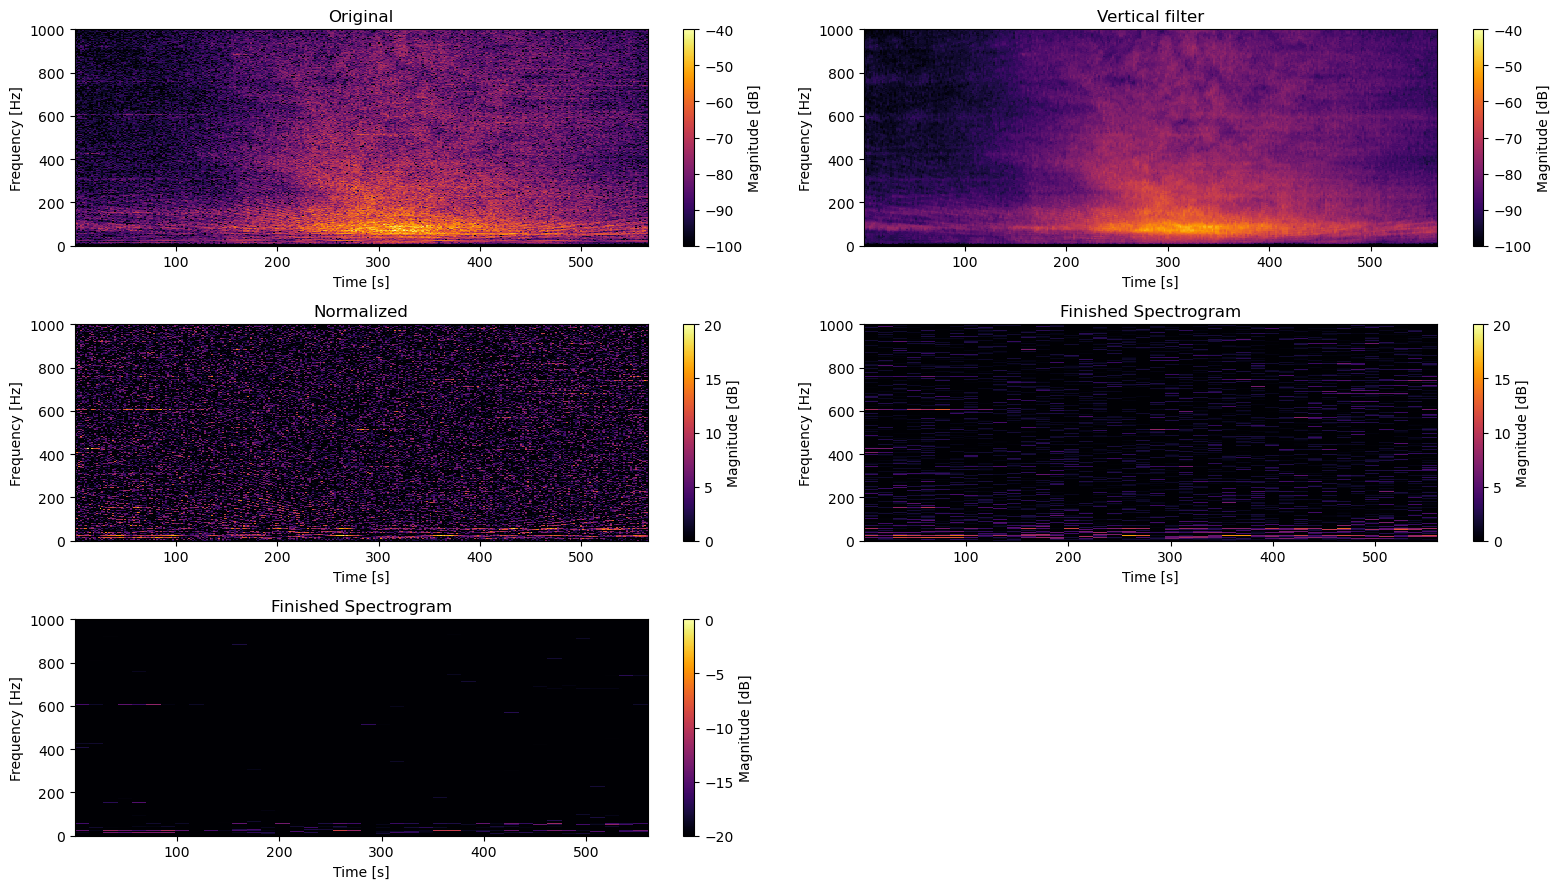

In [3]:
#Spectrogram
import numpy as np
from functions import spec_hfilt2, medfilt_vertcal_norm, load_audiofile, locate_low_amp
import scipy.signal as signal
from scipy.signal import resample_poly, hilbert
import matplotlib.pyplot as plt

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
fs  = 3000
x, fs = load_audiofile(input_file,fs, fc_low=10 ,remove_offcet=True)
tperseg=2
freq_filt=29
hfilt_length=15
f_max=1000
s_min=0
s_max=20
plot=False


"""Plot spectrogram of signal x.

Parameters
----------
x: array of floats
    Signal in time-domain
fs: float
    Sample rate [Samples/s]
tperseg: float
    Time resolution of spectrogram [s]
f_max: float
    Max. on frequency axis
freq_filt: int (odd)
    Number of frequency bins for smoothing and normalizing
hfilt_length: int
    Number of time bins for horizontal smoothing
plot: bool
    Determines if plot is generated
"""

# Calculate spectrogram
nperseg=int(tperseg*fs)
f1, t1, sx = signal.spectrogram(x, fs, nperseg=nperseg, detrend=False)

#med filt over hver kolonne
sxx_med = np.zeros_like(sx)
for i in range(sx.shape[1]):
    sxx_med[:,i] = signal.medfilt(sx[:,i],kernel_size=freq_filt)

#Normaliserer sxx

sx_norm = sx/sxx_med


sx_db = 10*np.log10(sx_norm)   # Convert to dB
sx_db, f, t = spec_hfilt2(sx_db,f1,t1,window_length=hfilt_length)



# Plot spectrogram
plt.figure(figsize=(16, 9))  # Define figure for results


plt.subplot(3, 2, 1)
plt.pcolormesh(t1, f1, 10*np.log10(sx), vmin=-100, vmax=-40, cmap='inferno')  # Draw spectrogram image
plt.xlabel("Time [s]")         # Axis labels and scales
plt.ylabel("Frequency [Hz]")
plt.ylim(0, f_max)
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.title("Original")

plt.subplot(3, 2, 2)
plt.pcolormesh(t1, f1, 10*np.log10(sxx_med), vmin=-100, vmax=-40, cmap='inferno')  # Draw spectrogram image
plt.xlabel("Time [s]")         # Axis labels and scales
plt.ylabel("Frequency [Hz]")
plt.ylim(0, f_max)
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.title("Vertical filter")

plt.subplot(3, 2, 3)
plt.pcolormesh(t1, f1, 10*np.log10(sx_norm), vmin=s_min, vmax=s_max, cmap='inferno')  # Draw spectrogram image
plt.xlabel("Time [s]")         # Axis labels and scales
plt.ylabel("Frequency [Hz]")
plt.ylim(0, f_max)
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.title("Normalized")

plt.subplot(3, 2, 4)
plt.pcolormesh(t, f, sx_db, vmin=s_min, vmax=20, cmap='inferno')  # Draw spectrogram image
plt.xlabel("Time [s]")         # Axis labels and scales
plt.ylabel("Frequency [Hz]")
plt.ylim(0, f_max)
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.title("Finished Spectrogram")

sx_db_min = sx_db.min()
sx_db_max = sx_db.max()

max_verdier = len(np.where((sx_db >= sx_db_max -20) & (sx_db <= sx_db_max )))

plt.subplot(3, 2, 5)
plt.pcolormesh(t, f, sx_db-sx_db_max, vmin=-20, vmax=None, cmap='inferno')  # Draw spectrogram image
plt.xlabel("Time [s]")         # Axis labels and scales
plt.ylabel("Frequency [Hz]")
plt.ylim(0, f_max)
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.title("Finished Spectrogram")

plt.tight_layout()

td: (18,), fd: (301,), sxx: (301, 18)


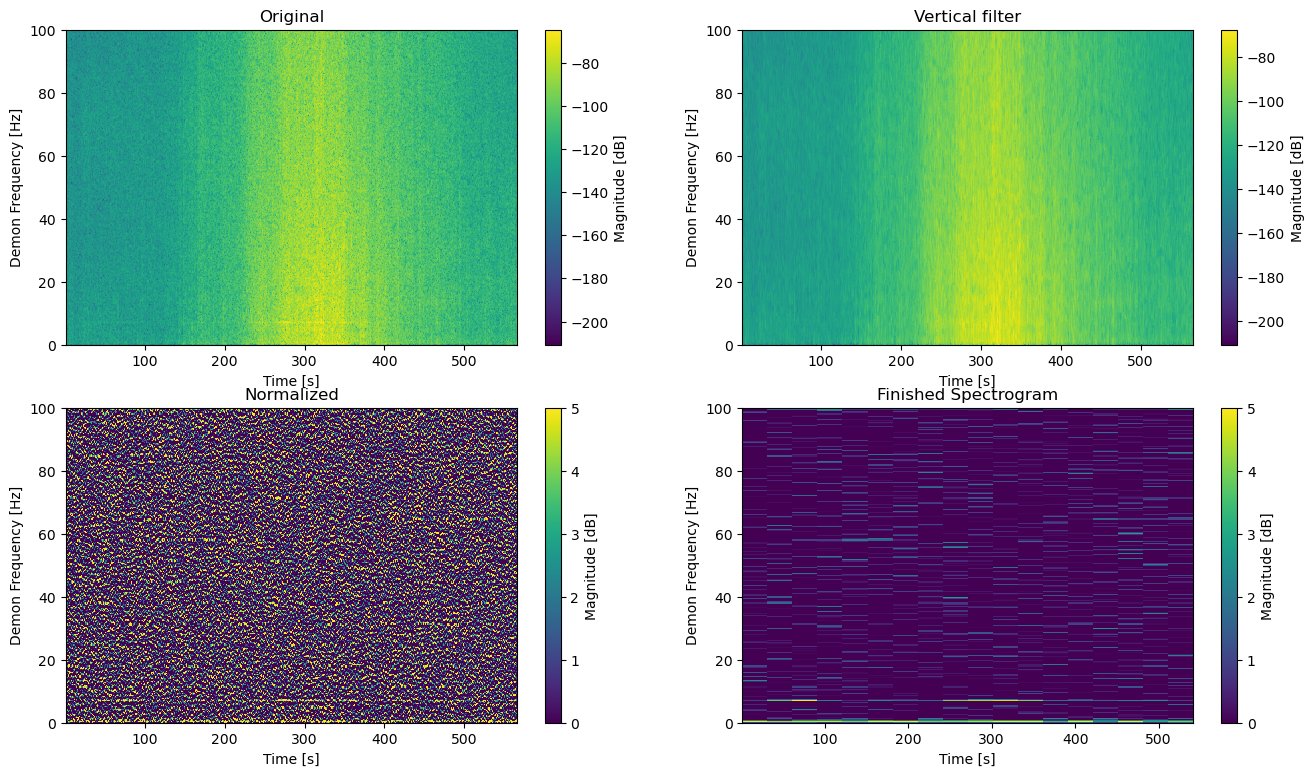

In [1]:
#DEMON
import numpy as np
from functions import spec_hfilt2, medfilt_vertcal_norm, load_audiofile, locate_low_amp
import scipy.signal as signal
from scipy.signal import resample_poly, hilbert
import matplotlib.pyplot as plt

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"
fs  = 3000
sx, fs = load_audiofile(input_file,fs,fc_low=5, remove_offcet=True)
Fds=200
freq_filt=7
hfilt_length=30
fmax=100
s_max=5
window="hamming"
plot=True

def average_filter(signal, window_size):
    """
    Applies an average filter to downsample the signal.
    
    Parameters:
    - signal (1D array): The input signal
    - window_size (int): Number of samples to average per output sample
    
    Returns:
    - downsampled_signal (1D array): The smoothed, downsampled signal
    """
    num_samples = len(signal) // window_size  # Determine new length
    return np.mean(signal[:num_samples * window_size].reshape(-1, window_size), axis=1)

"""
PARAMETERS:
    sx: array_like
        Time series of measurement values

    fs: int
        Sample frequency
    
    Fds: int
        Demon sample frequency
    
    freq_filt: int (odd)
        Number of frequency bins for smoothing and normalizing
    
    hfilt_length: int
        Number of time bins for smoothing
    
    fmax: float
        Max frequency for DEMON spectrogram
    
    s_max: float
        Max dB on spectrogram
    
    window: str
        Spectrogram window

RETURN:
    Plots the DEMON specrtogram for a given time series
"""

#RMS data of hilbert
kernal_size = int(fs/Fds) 
analytic_signal = np.abs(hilbert(sx))**2

#h_filt = signal.medfilt(analytic_signal,kernal_size)
#Downsampled so that each new sample is a mean of h_filt samples
#rms_values  = np.sqrt(resample_poly(h_filt,1,int(fs/kernal_size)))

rms_values = average_filter(analytic_signal, kernal_size)

#hente freq
nperseg= Fds*3 #Number of samples in time axis to use for each vertical spectrogram coloumn

fd_rms1, td_rms1, sxx_rms = signal.spectrogram(rms_values,Fds,
                                                nperseg=nperseg,
                                                noverlap=5*nperseg//6,
                                                #nfft=int(200*kernal_size / nperseg),
                                                window=window
                                                )


#Normaliserer sxx

#med filt over hver kolonne
sxx_med = np.zeros_like(sxx_rms)
for i in range(sxx_rms.shape[1]):
    sxx_med[:,i] = signal.medfilt(sxx_rms[:,i],kernel_size=freq_filt)

#Normaliserer sxx

sxx_rms_norm = sxx_rms/sxx_med


sxx_db = 10*np.log10(sxx_rms_norm)
fs = Fds

sxx_db, fd_rms, td_rms = spec_hfilt2(sxx_db,fd_rms1,td_rms1,window_length=hfilt_length)
print(f"td: {td_rms.shape}, fd: {fd_rms.shape}, sxx: {sxx_db.shape}")


plt.figure(figsize=(16,9))
plt.subplot(2, 2, 1)

plt.pcolormesh(td_rms1, fd_rms1, 10*np.log10(sxx_rms), vmin=None,vmax=None)
plt.xlabel("Time [s]")
plt.ylabel("Demon Frequency [Hz]")
plt.ylim(0,fmax)
plt.title("Original")
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale

plt.subplot(2, 2, 2)
plt.pcolormesh(td_rms1, fd_rms1, 10*np.log10(sxx_med), vmin=None,vmax=None)
plt.xlabel("Time [s]")
plt.ylabel("Demon Frequency [Hz]")
plt.ylim(0,fmax)
plt.title("Vertical filter")
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale

plt.subplot(2, 2, 3)
plt.pcolormesh(td_rms1, fd_rms1, 10*np.log10(sxx_rms_norm), vmin=0,vmax=s_max)
plt.xlabel("Time [s]")
plt.ylabel("Demon Frequency [Hz]")
plt.ylim(0,fmax)
plt.title("Normalized")
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale

plt.subplot(2, 2, 4)
plt.pcolormesh(td_rms, fd_rms, sxx_db, vmin=0,vmax=s_max)
plt.xlabel("Time [s]")
plt.ylabel("Demon Frequency [Hz]")
plt.ylim(0,fmax)
plt.title("Finished Spectrogram")
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale


    


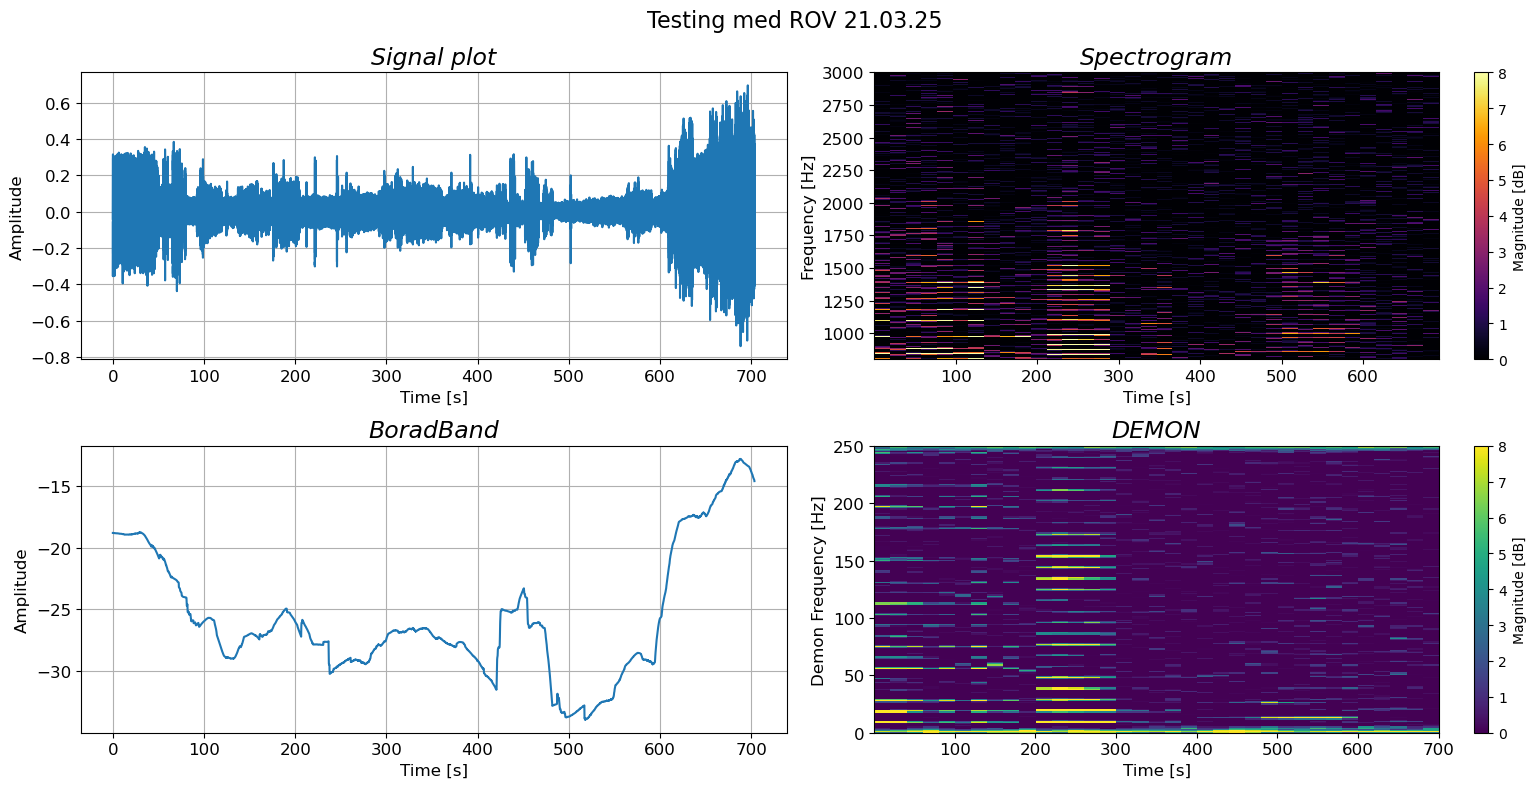

In [2]:
#Testing 21.03.25

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/lydopptak_210325.wav"
output_path= "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/lydopptak_210325.png"

import functions
import matplotlib.pyplot as plt
import numpy as np

fs = 10000

sx, fs = functions.load_audiofile(input_file, fs, 5, True)
t = np.linspace(0,len(sx)/fs,len(sx))
figure = plt.figure(figsize=(16,8))
figure.suptitle("Testing med ROV 21.03.25", fontsize=16)


plt.subplot(2,2,1) #Signal plot
plt.plot(t, sx)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Signal plot",fontsize=17,style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.subplot(2,2,2)
spec_t, spec_f, spec = functions.plot_spectrogram(sx,fs,tperseg=1, freq_filt=13, hfilt_length=20,f_max=2000,s_min=0,s_max=15,plot= False)

plt.pcolormesh(spec_t, spec_f, spec, vmin=0, vmax=8, cmap='inferno')  # Draw spectrogram image            
plt.xlabel("Time [s]",fontsize=12)         # Axis labels and scales
plt.ylabel("Frequency [Hz]",fontsize=12)
plt.title("Spectrogram",fontsize=17,style='italic')
plt.ylim(800, 3000)      
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
BB,bbt = functions.BB_data(sx,fs, hilbert_win=11,window_size=30)
plt.plot(bbt, BB)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("BoradBand",fontsize=17,style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)


plt.subplot(2,2,4)
Fds = 500
Demon_t, Demon_f, Demon = functions.DEMON_from_data(sx,fs,Fds,tperseg=1,freq_filt=15,hfilt_length=20,fmax = Fds/2,s_max=15, plot= False)
plt.pcolormesh(Demon_t, Demon_f, Demon, vmin=0,vmax=8)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("Demon Frequency [Hz]",fontsize=12)
plt.ylim(0,Fds/2)
plt.title("DEMON",fontsize=17, style='italic')
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
figure.savefig(output_path, format="png", dpi=300)

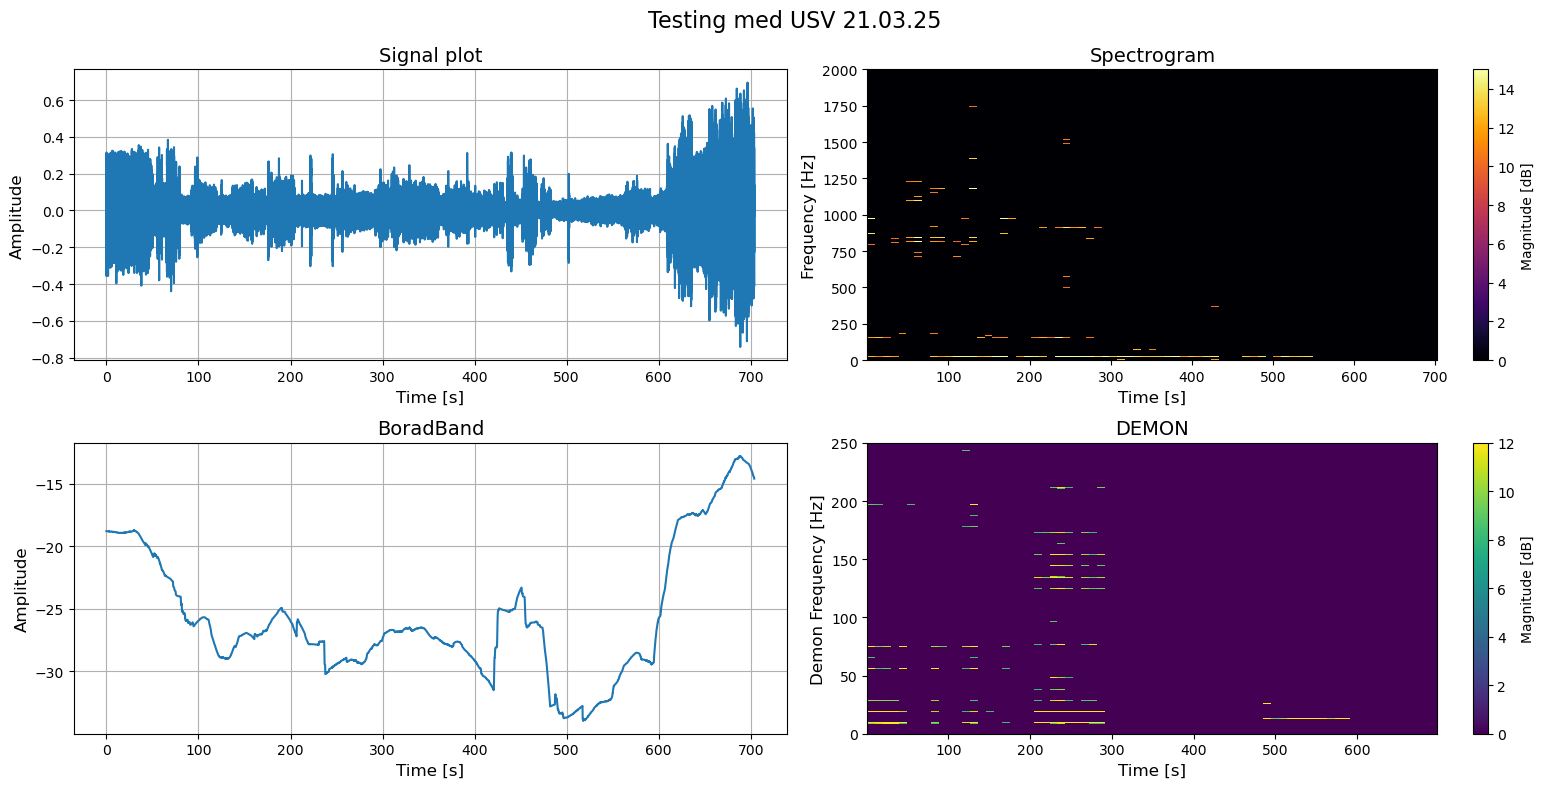

In [1]:
#Testing 21.03.25

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/lydopptak_210325.wav"
output_path= "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/lydopptak_210325.png"

import functions
import matplotlib.pyplot as plt
import numpy as np

fs = 10000

sx, fs = functions.load_audiofile(input_file, fs, 5, True)
#sx = sx[200*fs:300*fs]

t = np.linspace(0,len(sx)/fs,len(sx))
figure = plt.figure(figsize=(16,8))
figure.suptitle("Testing med USV 21.03.25", fontsize=16)


plt.subplot(2,2,1) #Signal plot
plt.plot(t, sx)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Signal plot",fontsize=14)
plt.grid(True)

plt.subplot(2,2,2)
spec_t, spec_f, spec = functions.plot_spectrogram(sx,fs,tperseg=1, freq_filt=13, hfilt_length=10,f_max=2000,s_min=0,s_max=15,plot= False)
plt.pcolormesh(spec_t, spec_f, spec*(spec >10), vmin=0, vmax=15, cmap='inferno')  # Draw spectrogram image            
plt.xlabel("Time [s]",fontsize=12)         # Axis labels and scales
plt.ylabel("Frequency [Hz]",fontsize=12)
plt.title("Spectrogram",fontsize=14)
plt.ylim(0, 2000)      
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale

plt.subplot(2,2,3)
BB,bbt = functions.BB_data(sx,fs, hilbert_win=11,window_size=30)
plt.plot(bbt, BB)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("BoradBand",fontsize=14)
plt.grid(True)


plt.subplot(2,2,4)
Fds = 500
Demon_t, Demon_f, Demon = functions.DEMON_from_data(sx,fs,Fds,tperseg=2,freq_filt=15,hfilt_length=10,fmax = Fds/2,s_max=15, plot= False)
plt.pcolormesh(Demon_t, Demon_f, Demon*(Demon>8), vmin=0,vmax=12)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("Demon Frequency [Hz]",fontsize=12)
plt.ylim(0,Fds/2)
plt.title("DEMON",fontsize=14)
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale

plt.tight_layout()
figure.savefig(output_path, format="png", dpi=300)

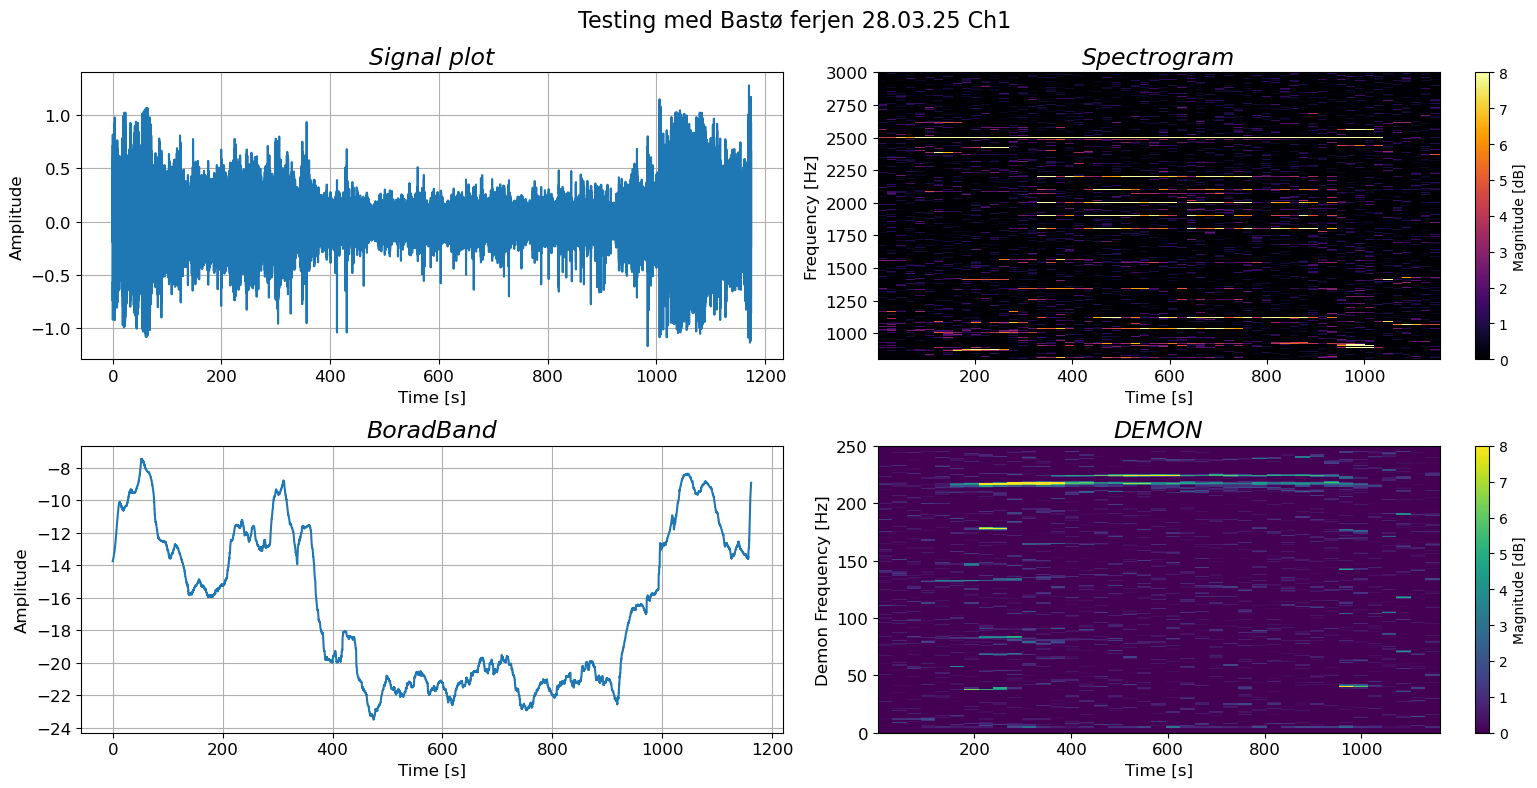

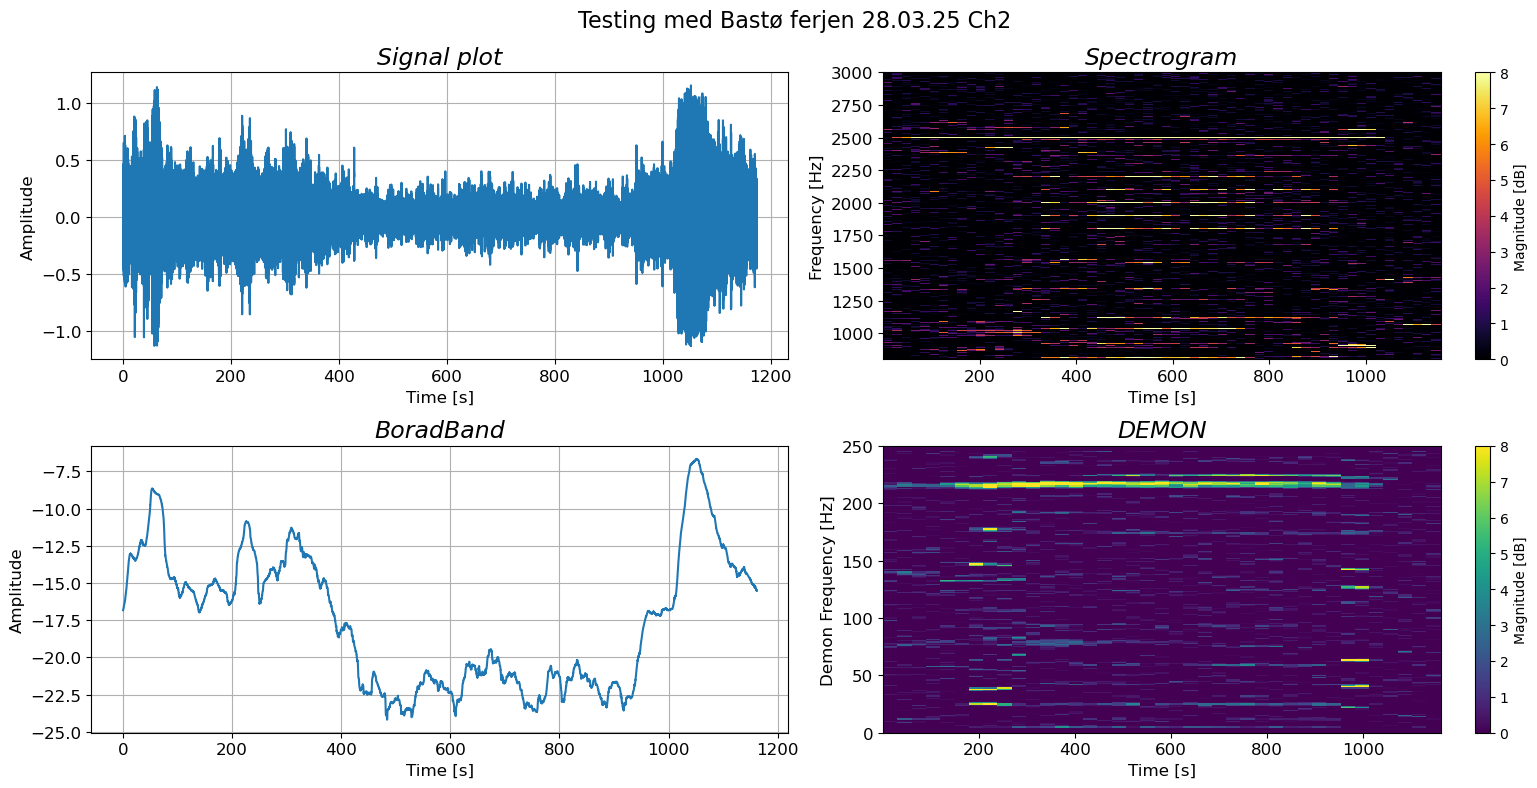

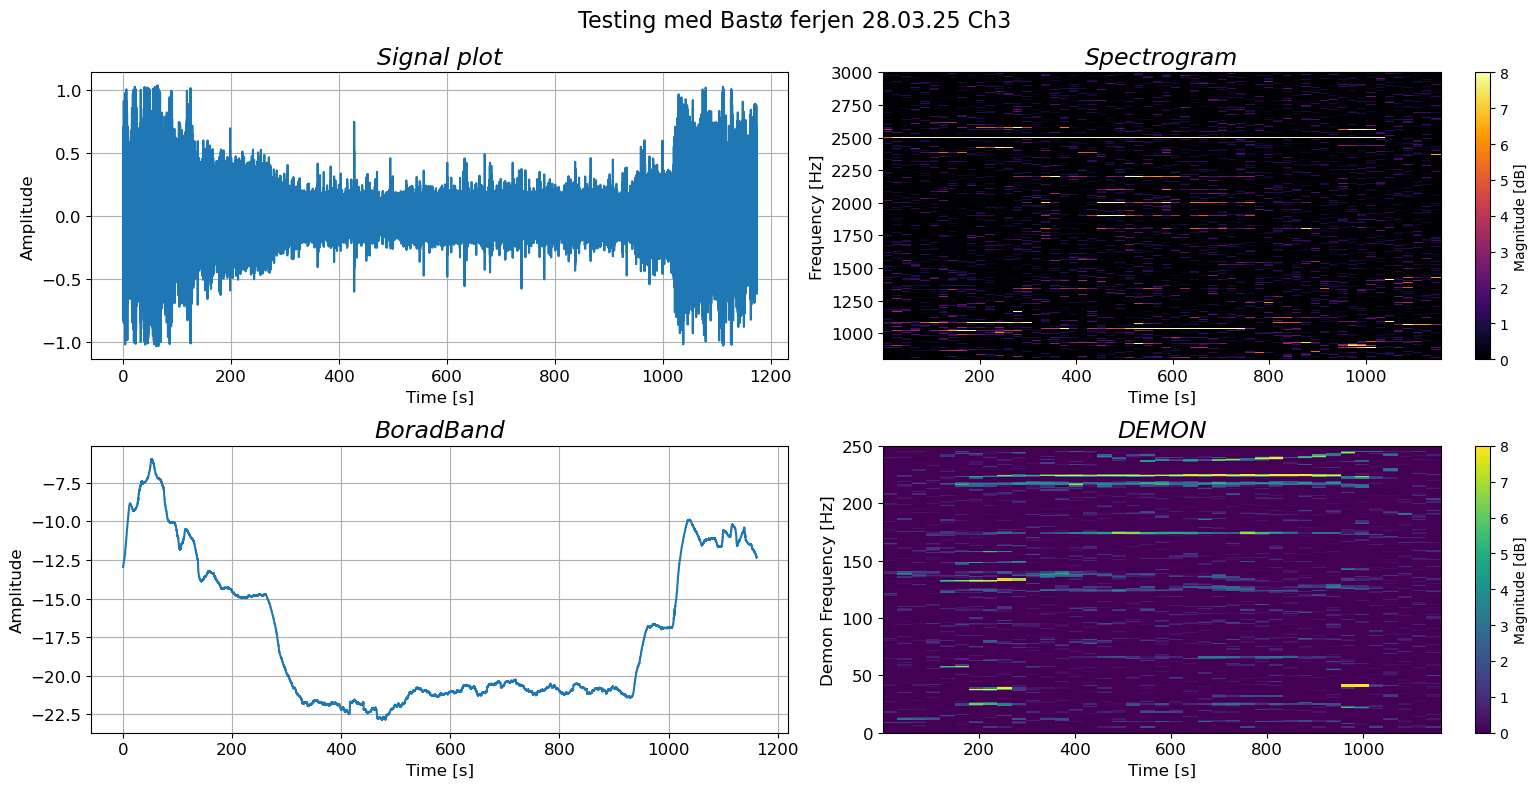

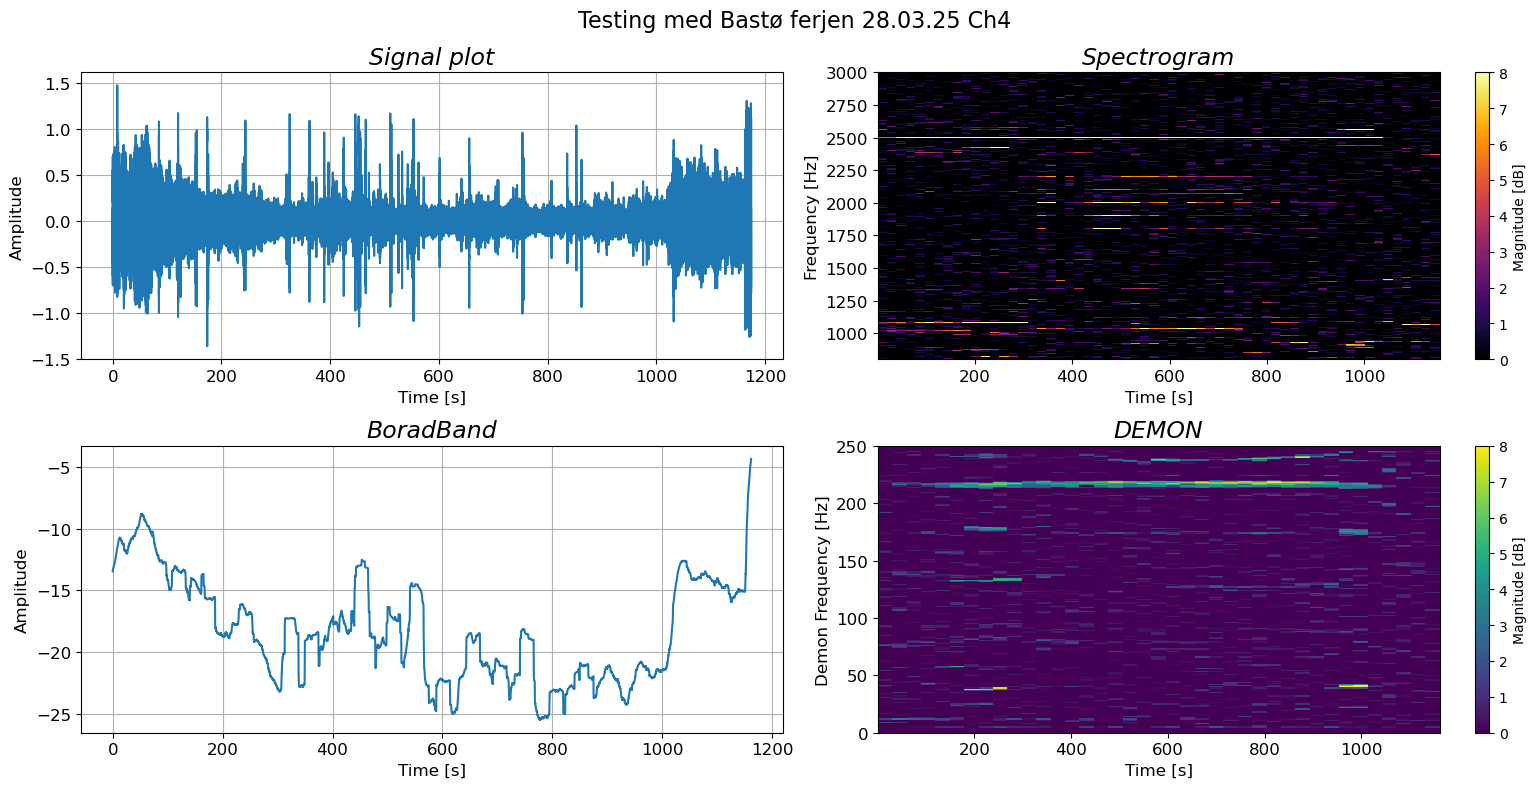

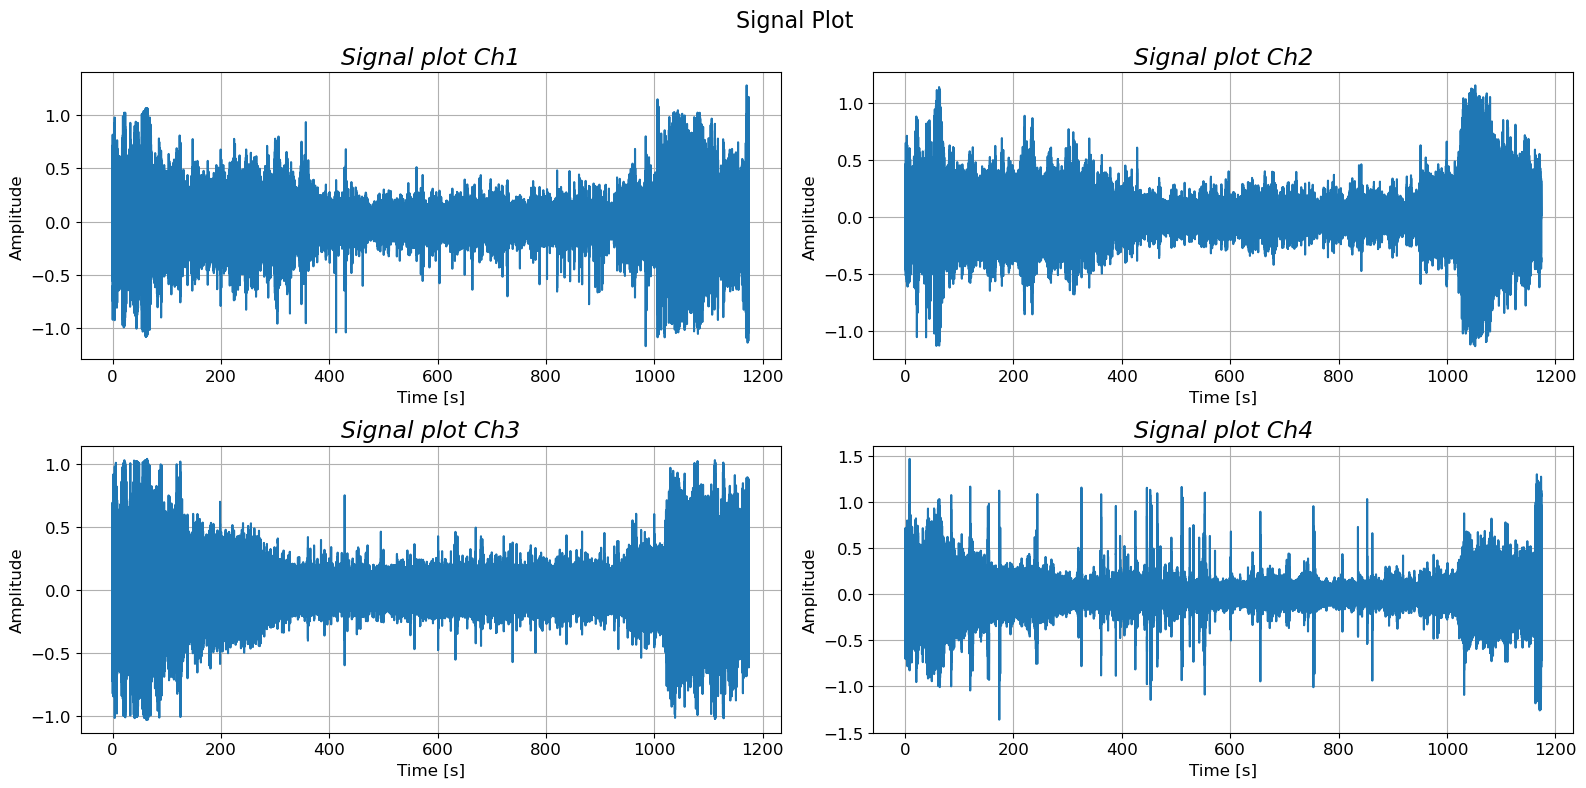

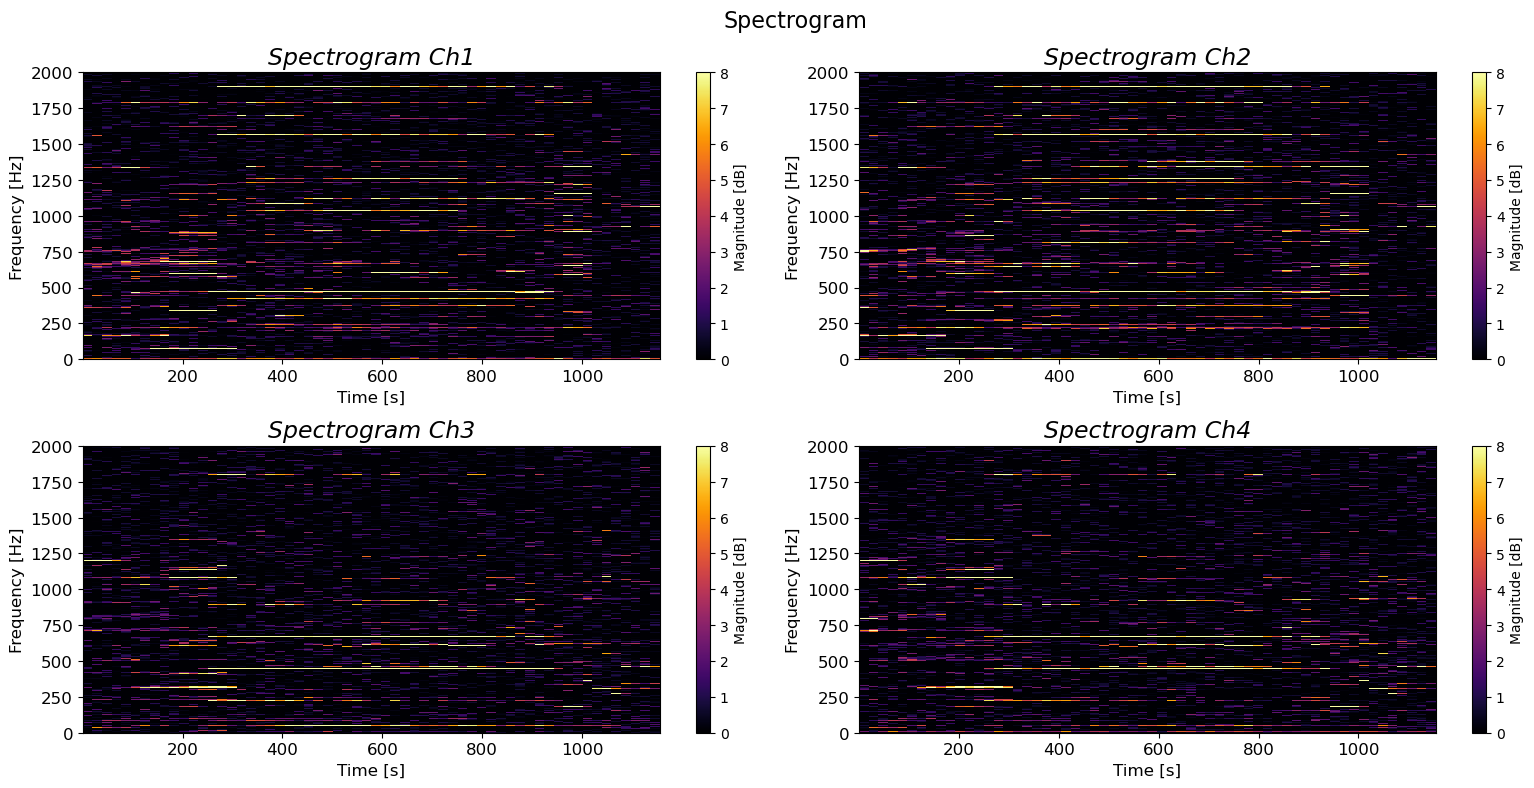

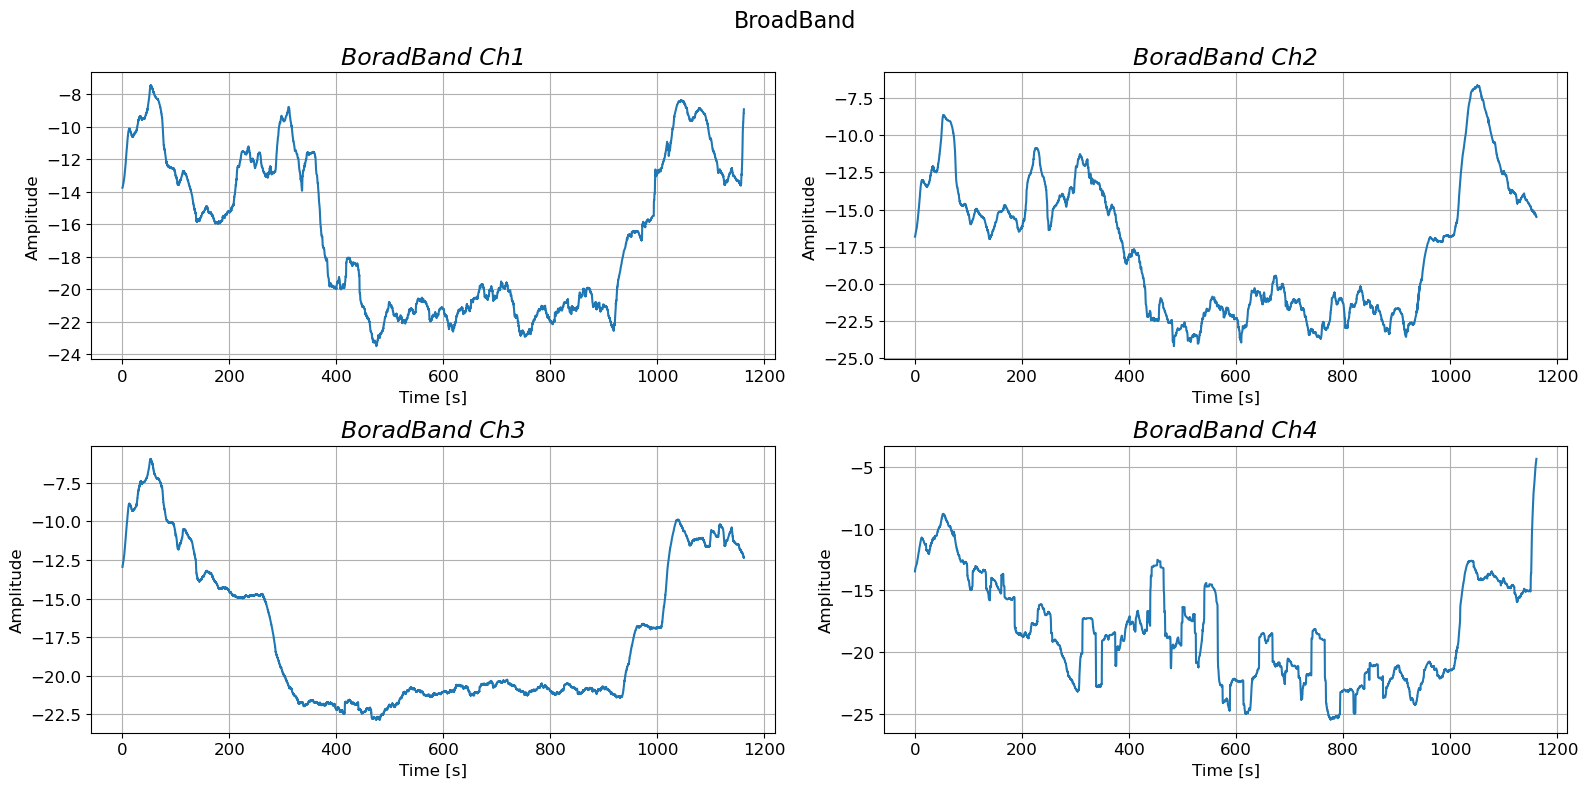

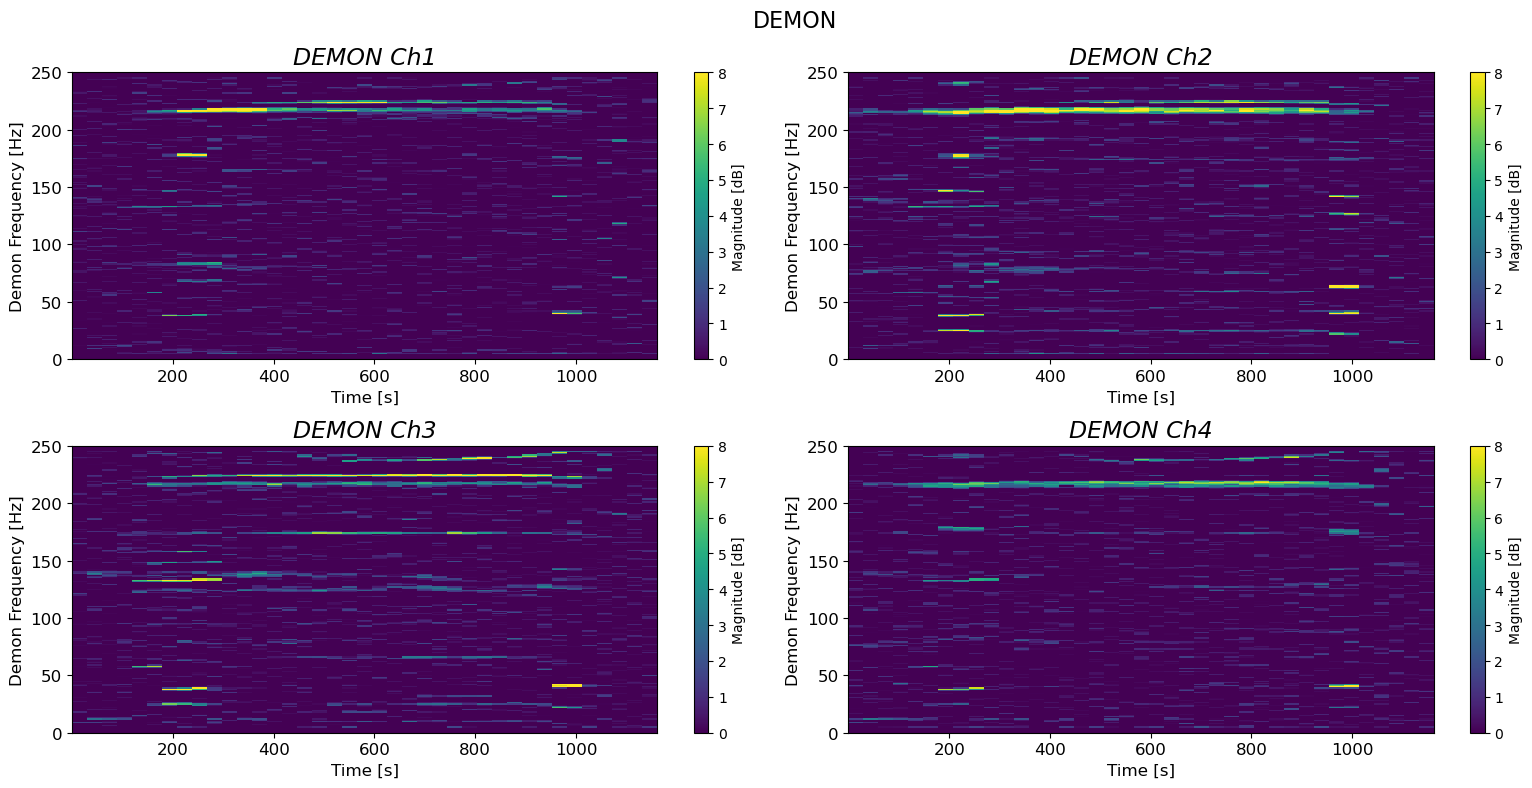

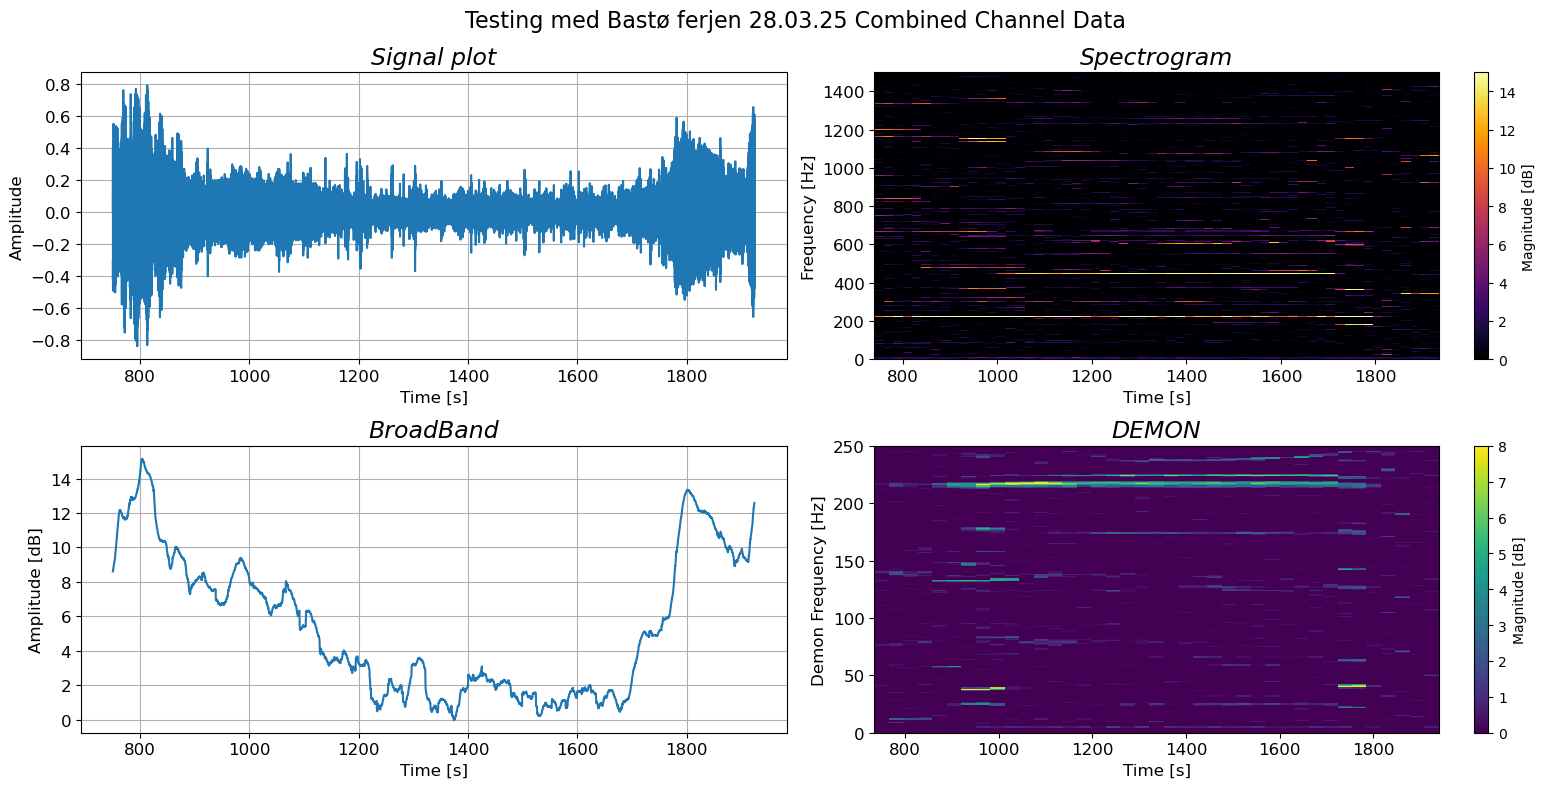

In [8]:
#Testing 21.03.25

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/opptak_280325.wav"
output_path= "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/opptak_280325.png"

Figtext = "Testing med Bastø ferjen 28.03.25"
pic_dir = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Rapport_figs/TestingFig_280325"

import functions
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy.signal as signal
fs = 10000

#sx, fs = functions.load_audiofile(input_file, fs, 5, True)
# Load audio data from the input file
data_offcet, fs = librosa.load(input_file, sr=fs, mono=False)  # Load the file, returns the audio signal and its sampling rate

b,a = signal.butter(N=4,Wn=5, btype="highpass",fs=fs)
data_offcet = signal.filtfilt(b,a,data_offcet)   
data = data_offcet - np.mean(data_offcet)  # Remove the mean (DC offset)

start_time = 750
stop_time = len(data[0])/fs

sx = np.zeros((4,len(data[0][start_time*fs:])))
for i in range(len(data)):
    sx[i] = data[i][start_time*fs:]

t = np.linspace(0,len(sx[0])/fs,len(sx[0]))

for i in range(0,4):

    fig1 = plt.figure(figsize=(16,8))
    fig1.suptitle(Figtext + f" Ch{i+1}", fontsize=16)
    plt.subplot(2,2,1) #Signal plot
    plt.plot(t, sx[i])
    plt.xlabel("Time [s]",fontsize=12)
    plt.ylabel("Amplitude",fontsize=12)
    plt.title("Signal plot",fontsize=17,style='italic')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    plt.subplot(2,2,2)
    spec_t, spec_f, spec = functions.plot_spectrogram(sx[i],fs,tperseg=1, freq_filt=13, hfilt_length=20,f_max=2000,s_min=0,s_max=15,plot= False)
    plt.pcolormesh(spec_t, spec_f, spec, vmin=0, vmax=8, cmap='inferno')  # Draw spectrogram image            
    plt.xlabel("Time [s]",fontsize=12)         # Axis labels and scales
    plt.ylabel("Frequency [Hz]",fontsize=12)
    plt.title("Spectrogram",fontsize=17,style='italic')
    plt.ylim(800, 3000)      
    plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.subplot(2,2,3)
    sxbuff = []
    BB,bbt,sxbuff = functions.BB_data(sx[i],fs,sxbuff, hilbert_win=11,window_size=25)
    plt.plot(bbt, BB)
    plt.xlabel("Time [s]",fontsize=12)
    plt.ylabel("Amplitude",fontsize=12)
    plt.title("BoradBand",fontsize=17,style='italic')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    plt.subplot(2,2,4)
    Fds = 500
    Demon_t, Demon_f, Demon = functions.DEMON_from_data(sx[i],fs,Fds,tperseg=1,freq_filt=13,hfilt_length=30,fmax = Fds/2,s_max=14, plot= False)
    plt.pcolormesh(Demon_t, Demon_f, Demon, vmin=0,vmax=8)
    plt.xlabel("Time [s]", fontsize=12)
    plt.ylabel("Demon Frequency [Hz]",fontsize=12)
    plt.ylim(0,Fds/2)
    plt.title("DEMON",fontsize=17, style='italic')
    plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    fig1.savefig(fname=pic_dir +f"/full_ch{i+1}.png", format="png", dpi=300)

#Signal plots
figsig = plt.figure(figsize=(16,8))
figsig.suptitle(f"Signal Plot", fontsize=16)
for j in range(0,4):
    plt.subplot(2,2,j+1) #Signal plot
    plt.plot(t, sx[j])
    plt.xlabel("Time [s]",fontsize=12)
    plt.ylabel("Amplitude",fontsize=12)
    plt.title(f"Signal plot Ch{j+1}",fontsize=17,style='italic')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
plt.tight_layout()
figsig.savefig(fname=pic_dir +f"/signal_all.png", format="png", dpi=300)

#Spectrograms
figspec = plt.figure(figsize=(16,8))
figspec.suptitle(f"Spectrogram", fontsize=16)
spec_all = np.zeros_like(spec)
for j in range(0,4):
    plt.subplot(2,2,j+1) #Signal plot
    spec_t, spec_f, spec = functions.plot_spectrogram(sx[j],fs,tperseg=1, freq_filt=13, hfilt_length=20,f_max=2000,s_min=0,s_max=15,plot= False)
    spec_all += spec /4
    plt.pcolormesh(spec_t, spec_f, spec, vmin=0, vmax=8, cmap='inferno')  # Draw spectrogram image            
    plt.xlabel("Time [s]",fontsize=12)         # Axis labels and scales
    plt.ylabel("Frequency [Hz]",fontsize=12)
    plt.title(f"Spectrogram Ch{j+1}",fontsize=17,style='italic')
    plt.ylim(0, 2000)      
    plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
figspec.savefig(fname=pic_dir +f"spectrogram_all.png", format="png", dpi=300)

#BroadBand
figBB = plt.figure(figsize=(16,8))
figBB.suptitle(f"BroadBand", fontsize=16)
BB_all = np.zeros_like(BB)
for j in range(0,4):
    sxbuff = []
    plt.subplot(2,2,j+1)
    BB,bbt,sxbuff = functions.BB_data(sx[j],fs,sxbuff, hilbert_win=11,window_size=25)
    BB_all += BB /4
    plt.plot(bbt, BB)
    plt.xlabel("Time [s]",fontsize=12)
    plt.ylabel("Amplitude",fontsize=12)
    plt.title(f"BoradBand Ch{j+1}",fontsize=17,style='italic')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
plt.tight_layout()
figBB.savefig(fname=pic_dir +f"/BroadBand_all.png", format="png", dpi=300)

#DEMON
figDemon = plt.figure(figsize=(16,8))
figDemon.suptitle(f"DEMON", fontsize=16)
Demon_all = np.zeros_like(Demon)
for j in range(0,4):
    plt.subplot(2,2,j+1)
    Fds = 500
    Demon_t, Demon_f, Demon = functions.DEMON_from_data(sx[j],fs,Fds,tperseg=1,freq_filt=13,hfilt_length=30,fmax = Fds/2,s_max=14, plot= False)
    Demon_all += Demon/4
    plt.pcolormesh(Demon_t, Demon_f, Demon, vmin=0,vmax=8)
    plt.xlabel("Time [s]", fontsize=12)
    plt.ylabel("Demon Frequency [Hz]",fontsize=12)
    plt.ylim(0,Fds/2)
    plt.title(f"DEMON Ch{j+1}",fontsize=17, style='italic')
    plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
figDemon.savefig(fname=pic_dir +f"/DEMON_all.png", format="png", dpi=300)

#All channels

fig_all = plt.figure(figsize=(16,8))
fig_all.suptitle(Figtext + f" Combined Channel Data", fontsize=16)
plt.subplot(2,2,1) #Signal plot
sx_all = (sx[0]+sx[1]+sx[2]+sx[3])/4
t = np.linspace(start_time, stop_time, len(t))
plt.plot(t, sx_all)
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude",fontsize=12)
plt.title("Signal plot",fontsize=17,style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.subplot(2,2,2)
spec_t = np.linspace(start_time, stop_time, len(spec_t))
plt.pcolormesh(spec_t, spec_f, spec_all, vmin=0, vmax=15, cmap='inferno')  # Draw spectrogram image            
plt.xlabel("Time [s]",fontsize=12)         # Axis labels and scales
plt.ylabel("Frequency [Hz]",fontsize=12)
plt.title("Spectrogram",fontsize=17,style='italic')
plt.ylim(0, 1500)      
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
bbt = np.linspace(start_time, stop_time, len(bbt))
plt.plot(bbt, BB_all - np.min(BB_all))
plt.xlabel("Time [s]",fontsize=12)
plt.ylabel("Amplitude [dB]",fontsize=12)
plt.title("BroadBand",fontsize=17,style='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.subplot(2,2,4)
Demon_t = np.linspace(start_time, stop_time, len(Demon_t))
plt.pcolormesh(Demon_t, Demon_f, Demon_all, vmin=0,vmax=8)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("Demon Frequency [Hz]",fontsize=12)
plt.ylim(0,Fds/2)
plt.title("DEMON",fontsize=17, style='italic')
plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
fig_all.savefig(fname=pic_dir +f"/all_channels.png", format="png", dpi=300)
